In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import chi2, RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score, mean_squared_error, r2_score, auc, precision_recall_curve

In [56]:
dataset_diabetes = pd.read_csv('/content/drive/MyDrive/kuliah/DataMining/DiabetesMelitus/dataset/diabetes_data.csv')
df = dataset_diabetes.copy()
dataset_diabetes.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
dataset_diabetes.shape

(70692, 18)

In [58]:
dataset_diabetes.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

# Tentang dataset

Age = dalam 13 kategori

      1 = 18-24 || 2 = 25-29 || 3 = 30-34 || 4 = 35-39 || 5 = 40-44
      6 = 45-49 || 7 = 50-54 || 8 = 55-59 || 9 = 60-64 || 10 = 65-69
      11 = 70-74 || 12 = 75-79 || 13 = 80 atau lebih tua


Sex: Jenis kelamin pasien

    0 = perempuan
    1 = laki-laki

HighChol: Kolesterol tinggi

    0 = tidak memiliki kolesterol tinggi
    1 = memiliki kolesterol tinggi

CholCheck: Pemeriksaan kolesterol dalam 5 tahun terakhir

    0 = tidak pernah melakukan pemeriksaan kolesterol dalam 5 tahun
    1 = pernah melakukan pemeriksaan kolesterol dalam 5 tahun

BMI: Indeks Massa Tubuh

Smoker: Pernahkah Anda merokok minimal 100 batang rokok sepanjang hidup (Catatan: 5 bungkus = 100 batang rokok)

    0 = tidak pernah
    1 = pernah

HeartDiseaseorAttack: Penyakit jantung koroner atau serangan jantung

    0 = tidak memiliki penyakit jantung koroner atau serangan jantung
    1 = memiliki penyakit jantung koroner atau serangan jantung

PhysActivity: Aktivitas fisik dalam 30 hari terakhir - tidak termasuk pekerjaan

    0 = tidak melakukan aktivitas fisik
    1 = melakukan aktivitas fisik

Fruits: Mengonsumsi buah minimal 1 kali atau lebih per hari

    0 = tidak mengonsumsi buah
    1 = mengonsumsi buah

Veggies: Mengonsumsi sayur minimal 1 kali atau lebih per hari

    0 = tidak mengonsumsi sayur
    1 = mengonsumsi sayur

HvyAlcoholConsump: Konsumsi alkohol berat (pria dewasa >= 14 minuman per minggu; wanita dewasa >= 7 minuman per minggu)

    0 = tidak mengonsumsi alkohol berat
    1 = mengonsumsi alkohol berat

GenHlth: Bagaimana Anda menilai kesehatan secara umum pada skala 1-5

    1 = sangat baik
    2 = baik sekali
    3 = baik
    4 = cukup baik
    5 = buruk

MentHlth: Jumlah hari masalah kesehatan mental dalam skala 1-30 hari

    1-30 = dari sangat baik hingga buruk (hari)

PhysHlth: Jumlah hari sakit atau cedera fisik dalam 30 hari terakhir dalam skala 1-30

    1-30 = dari sangat baik hingga buruk (hari)

DiffWalk: Apakah Anda mengalami kesulitan serius dalam berjalan atau menaiki tangga?

    0 = tidak
    1 = ya

Stroke: Pernahkah Anda mengalami stroke?

    0 = tidak pernah
    1 = pernah

HighBP: Tekanan darah tinggi

    0 = tidak memiliki tekanan darah tinggi
    1 = memiliki tekanan darah tinggi

Class Diabetes: Klasifikasi diabetes

    0 = tidak memiliki diabetes
    1 = memiliki diabetes








# EDA

In [59]:
dataset_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [60]:
dataset_diabetes.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Mencari Missing Value => Tidak ada

In [61]:
dataset_diabetes.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

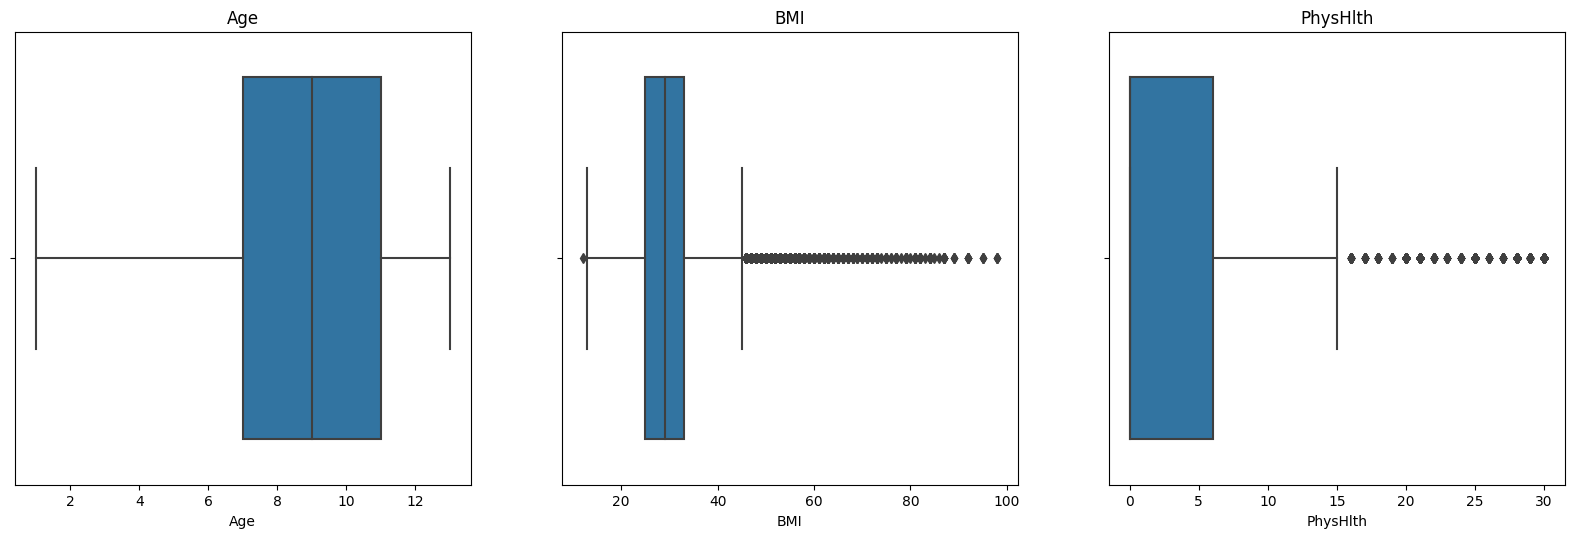

In [67]:
plt.figure(figsize=(20, 20))
columns = ['Age', 'BMI', 'PhysHlth']
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=dataset_diabetes[col])
    plt.title(col)

In [80]:
print(df['BMI'].value_counts().sort_index().to_string())

12.0       1
13.0       8
14.0       8
15.0      30
16.0      70
17.0     170
18.0     366
19.0     691
20.0    1256
21.0    2028
22.0    2778
23.0    3315
24.0    4392
25.0    4031
26.0    4975
27.0    6327
28.0    4583
29.0    4219
30.0    4344
31.0    3753
32.0    3481
33.0    3159
34.0    2564
35.0    2107
36.0    1794
37.0    1607
38.0    1415
39.0    1189
40.0     970
41.0     701
42.0     686
43.0     665
44.0     456
45.0     373
46.0     359
47.0     272
48.0     236
49.0     195
50.0     195
51.0     122
52.0     111
53.0     109
54.0      57
55.0      79
56.0      50
57.0      37
58.0      44
59.0      25
60.0      29
61.0      20
62.0      18
63.0      20
64.0       9
65.0      11
66.0       9
67.0       8
68.0       7
69.0       4
70.0       5
71.0       9
72.0       9
73.0      12
74.0       1
75.0       9
76.0       2
77.0      18
78.0       1
79.0      17
80.0       1
81.0       9
82.0      11
83.0       1
84.0      13
85.0       1
86.0       1
87.0      13
89.0       4

In [81]:
print(df['PhysHlth'].value_counts().sort_index().to_string())

0.0     39915
1.0      2853
2.0      4102
3.0      2438
4.0      1376
5.0      2332
6.0       447
7.0      1326
8.0       276
9.0        55
10.0     1980
11.0       22
12.0      205
13.0       26
14.0      802
15.0     1913
16.0       50
17.0       35
18.0       50
19.0       10
20.0     1292
21.0      229
22.0       31
23.0       27
24.0       24
25.0      557
26.0       26
27.0       34
28.0      211
29.0       95
30.0     7953


In [62]:
print(df.drop('Diabetes', axis=1).duplicated().sum())
print(df.drop('Diabetes', axis=1).duplicated(keep=False).sum())

8632
13426


In [82]:
dp = df.drop('Diabetes', axis=1)

sample = [0, 3, 5, 8, 11, 14, 17, 18, 19]

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

for i in sample:

  duplicate_rows = dp[dp.duplicated(keep=False)]
  index_of_duplicate = duplicate_rows.index[i]  # Memilih salah satu baris duplikat
  selected_row = dp.loc[index_of_duplicate]

  matching_rows = df[df.duplicated(subset=df.columns.drop('Diabetes'), keep=False)]
  matching_rows = matching_rows.loc[matching_rows[df.columns.drop('Diabetes')].eq(selected_row).all(axis=1)]

  print(matching_rows)
  print()

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Stroke  HighBP  Diabetes
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0           1.0     1.0      1.0                0.0      3.0       0.0       3.0       0.0     0.0     1.0       0.0
47924  11.0  1.0       1.0        1.0  28.0     1.0                   0.0           1.0     1.0      1.0                0.0      3.0       0.0       3.0       0.0     0.0     1.0       1.0

       Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Stroke  HighBP  Diabetes
12     7.0  1.0       1.0        1.0  27.0     0.0                   0.0           1.0     1.0      1.0                0.0      2.0       0.0       0.0       0.0     0.0     1.0       0.0
18338  7.0  1.0       1.0        1.0  27.0     0.0      

Variable unik

In [83]:
for col in df.columns:
    unique_counts = df[col].nunique()
    print(f"Jumlah nilai unik dalam {col}: {unique_counts}")

Jumlah nilai unik dalam Age: 13
Jumlah nilai unik dalam Sex: 2
Jumlah nilai unik dalam HighChol: 2
Jumlah nilai unik dalam CholCheck: 2
Jumlah nilai unik dalam BMI: 80
Jumlah nilai unik dalam Smoker: 2
Jumlah nilai unik dalam HeartDiseaseorAttack: 2
Jumlah nilai unik dalam PhysActivity: 2
Jumlah nilai unik dalam Fruits: 2
Jumlah nilai unik dalam Veggies: 2
Jumlah nilai unik dalam HvyAlcoholConsump: 2
Jumlah nilai unik dalam GenHlth: 5
Jumlah nilai unik dalam MentHlth: 31
Jumlah nilai unik dalam PhysHlth: 31
Jumlah nilai unik dalam DiffWalk: 2
Jumlah nilai unik dalam Stroke: 2
Jumlah nilai unik dalam HighBP: 2
Jumlah nilai unik dalam Diabetes: 2


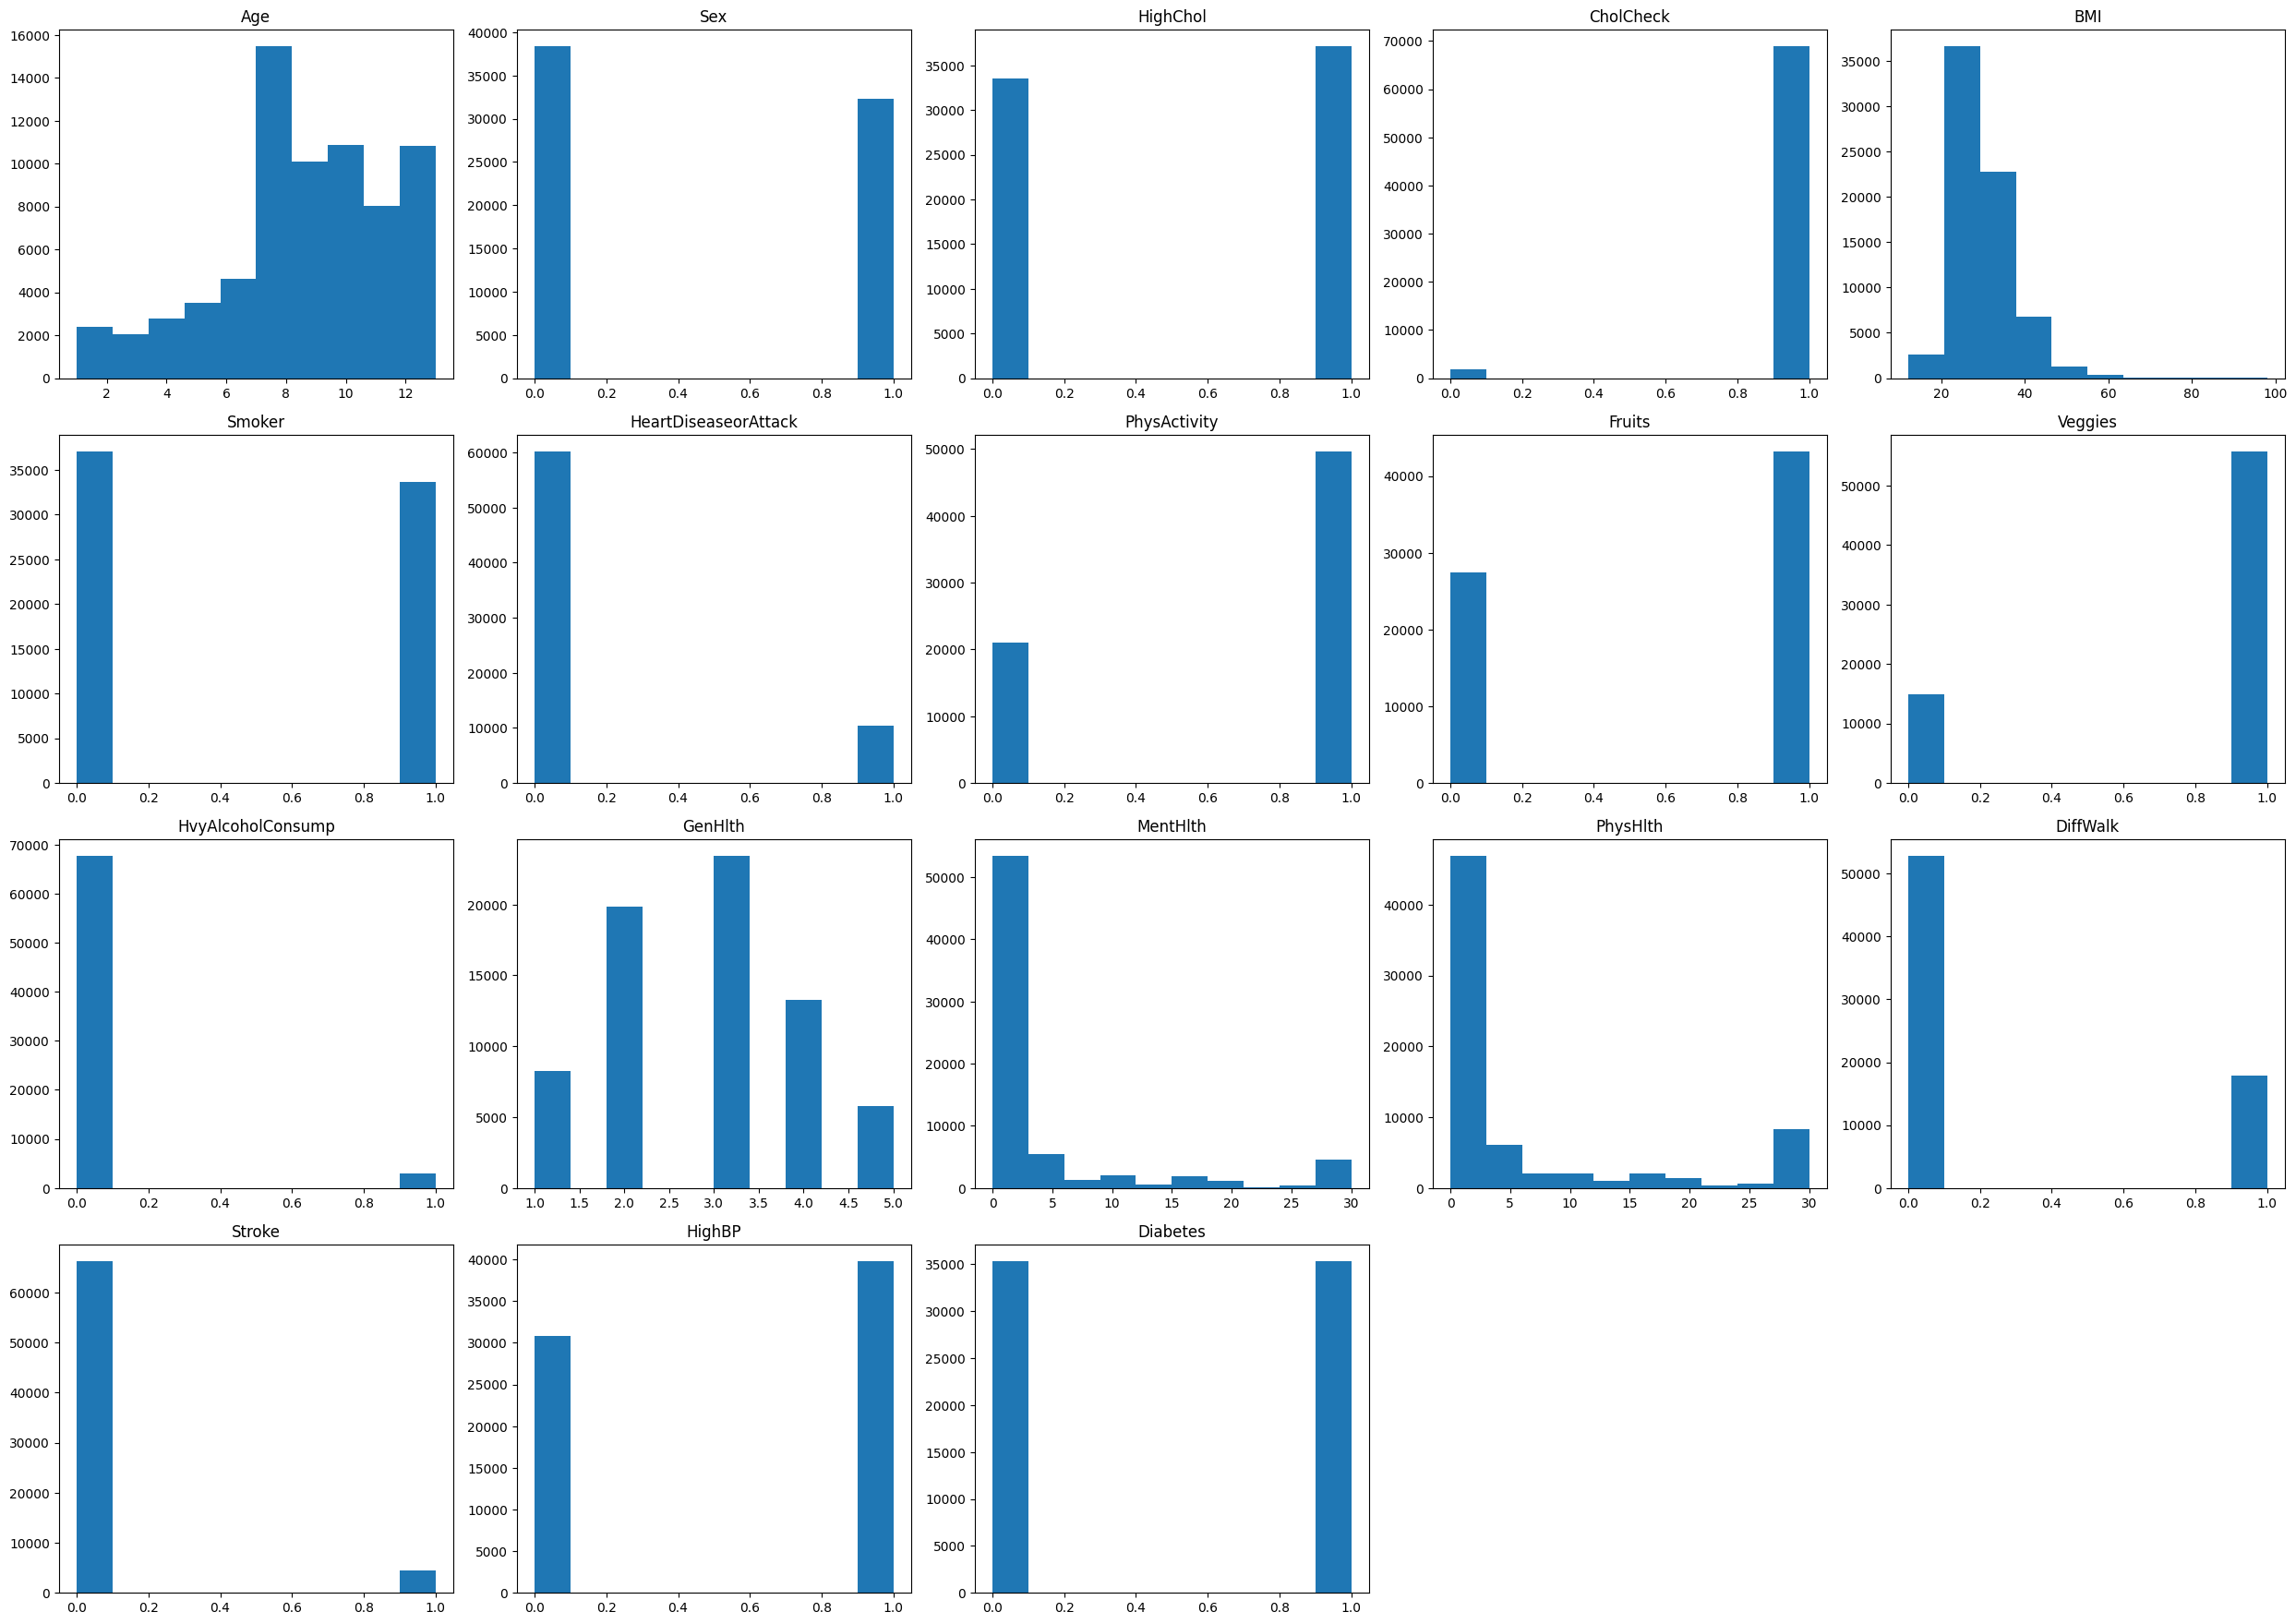

In [84]:
plt.figure(figsize=(25, 35))
for i, col in enumerate(df.columns):
    plt.subplot(8, 5, i+1)
    plt.hist(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

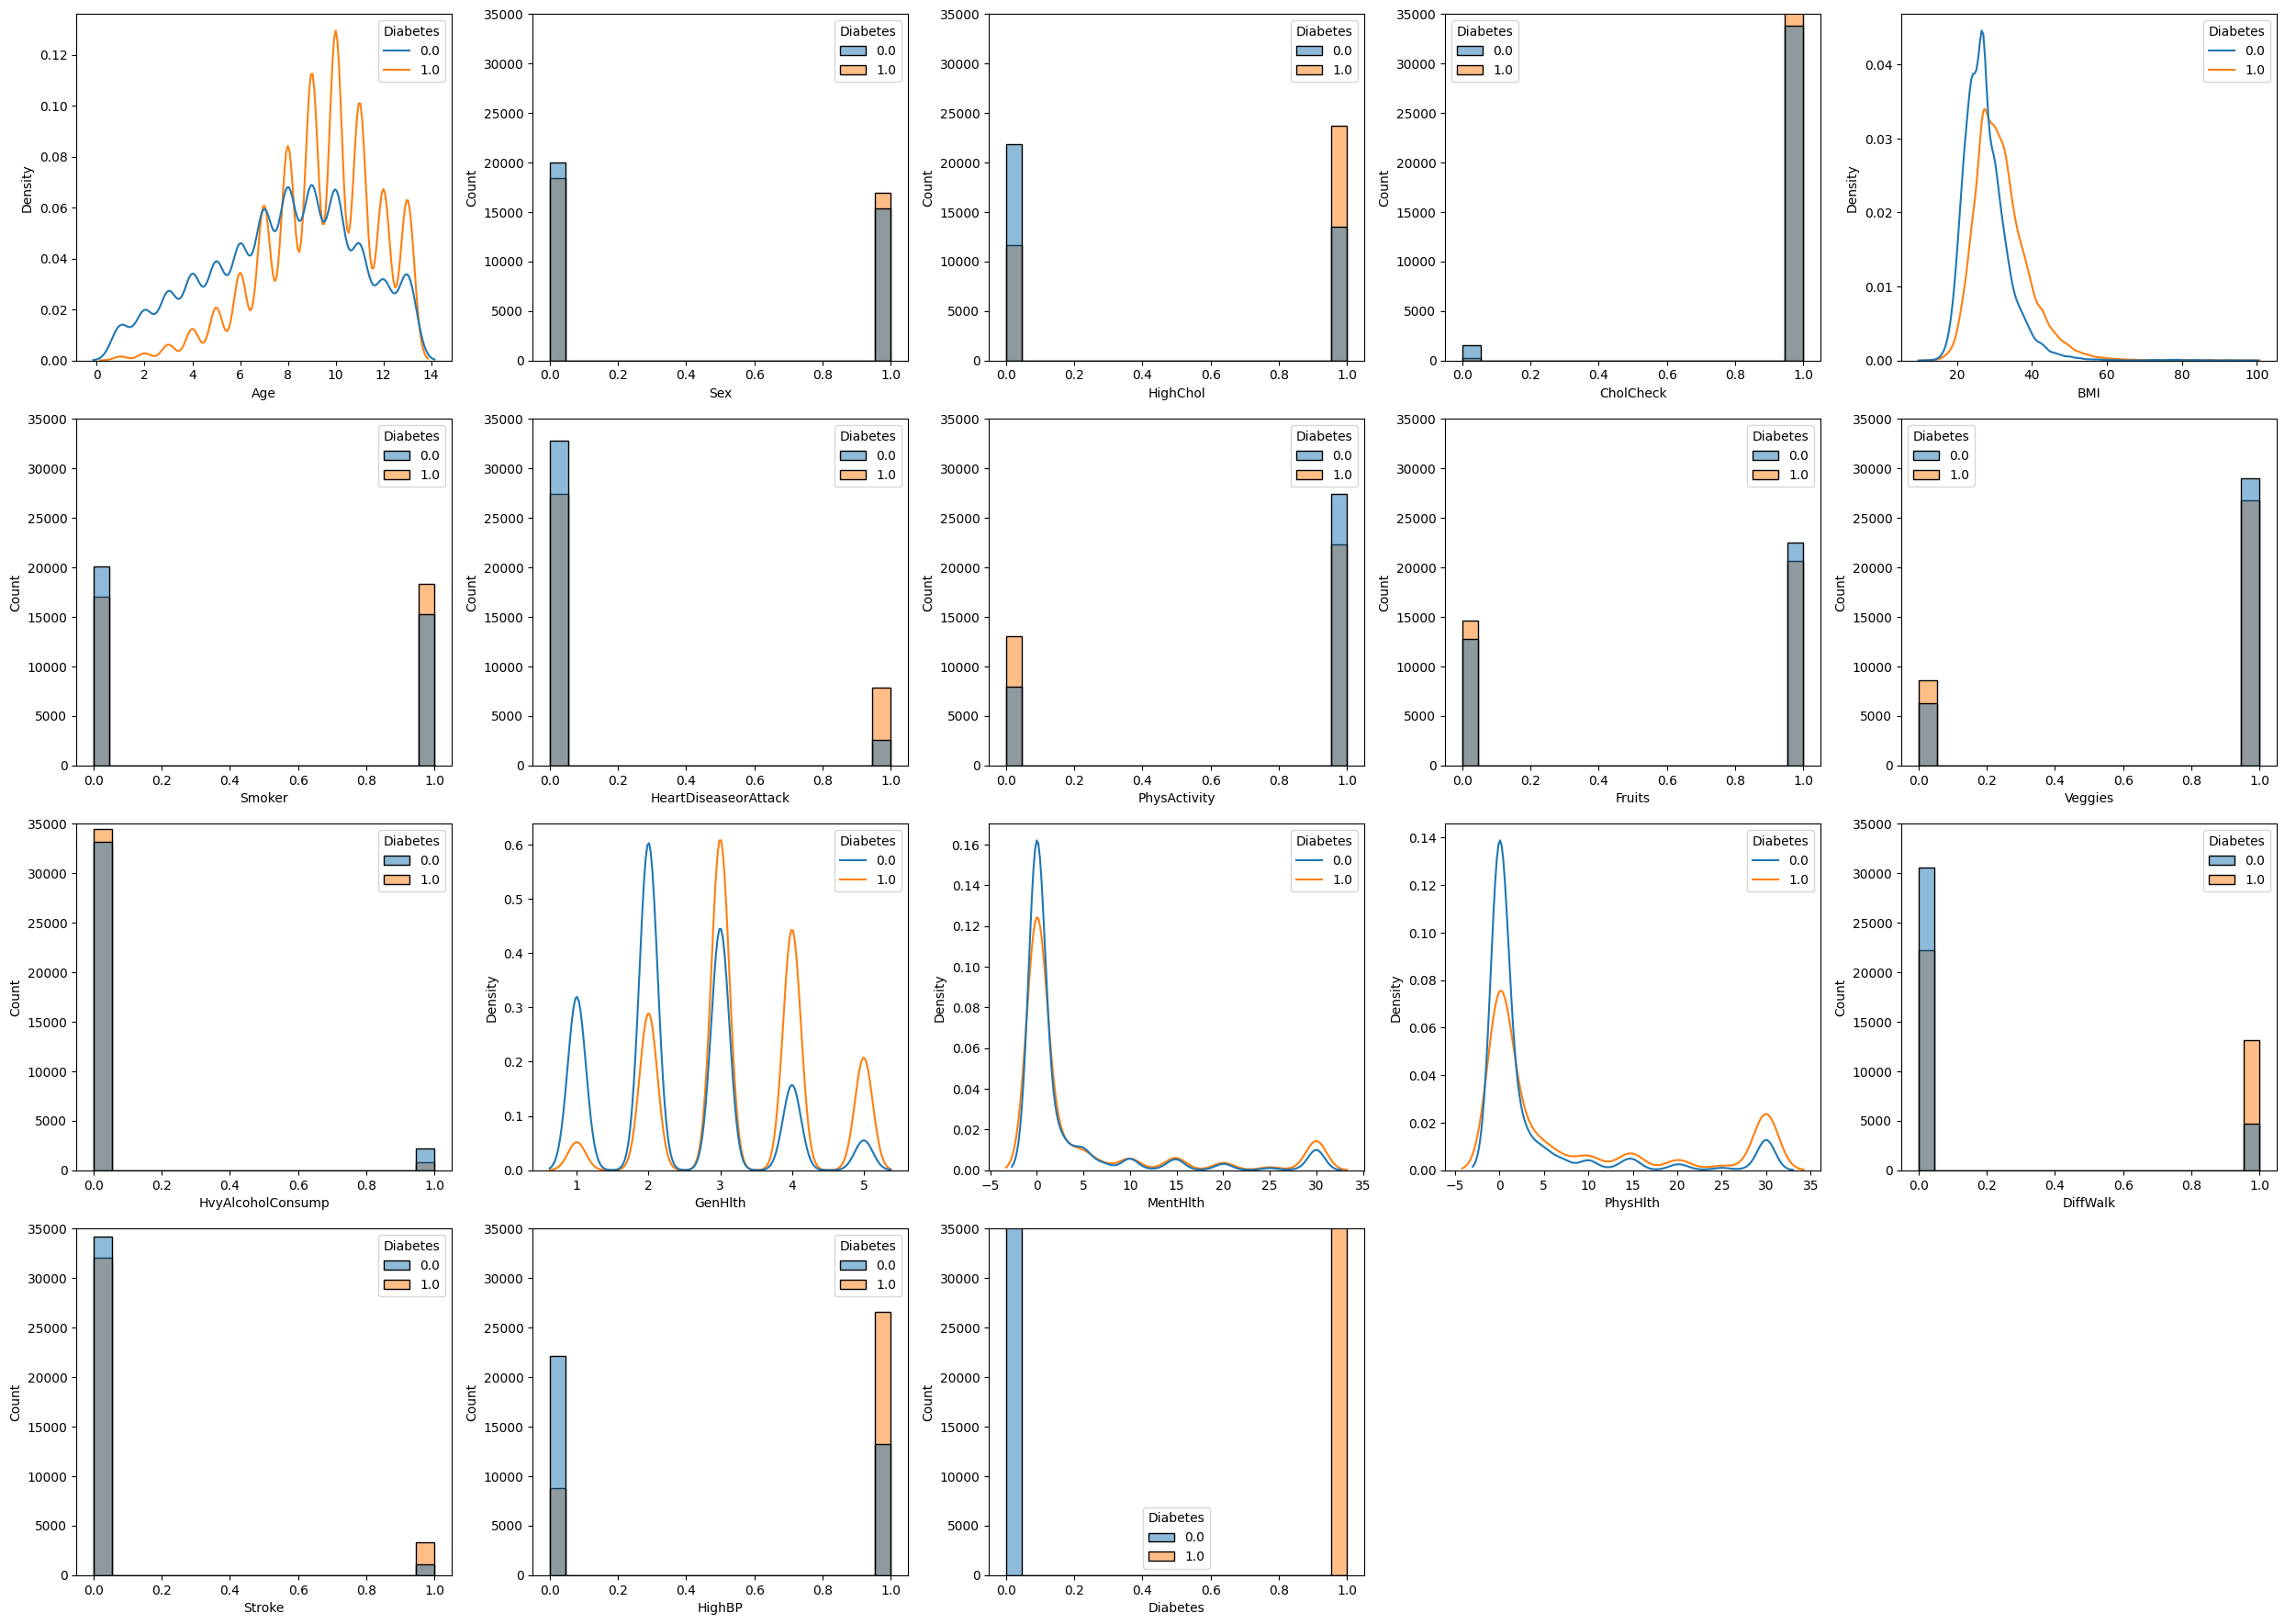

In [ ]:
plt.figure(figsize=(25,35))
for i, col in  enumerate(df.columns):
    plt.subplot(8,5,i+1)
    if col=='Age' or col=='BMI' or col=='GenHlth' or col=='PhysHlth' or col =='MentHlth' :
      sns.kdeplot(data=df, x=col, hue='Diabetes')
    else :
      sns.histplot(data= df, x=col, hue='Diabetes')
      plt.ylim(0, 35000)
plt.tight_layout()
plt.show()

In [ ]:
if df['HvyAlcoholConsump'].any() == 1 :
  print((df['PhysActivity'] == 1).value_counts())

# if df['HvyAlcoholConsump'].any() == 0 :
#   print(df['PhysActivity'].value_counts())


True     49699
False    20993
Name: PhysActivity, dtype: int64


<Axes: >

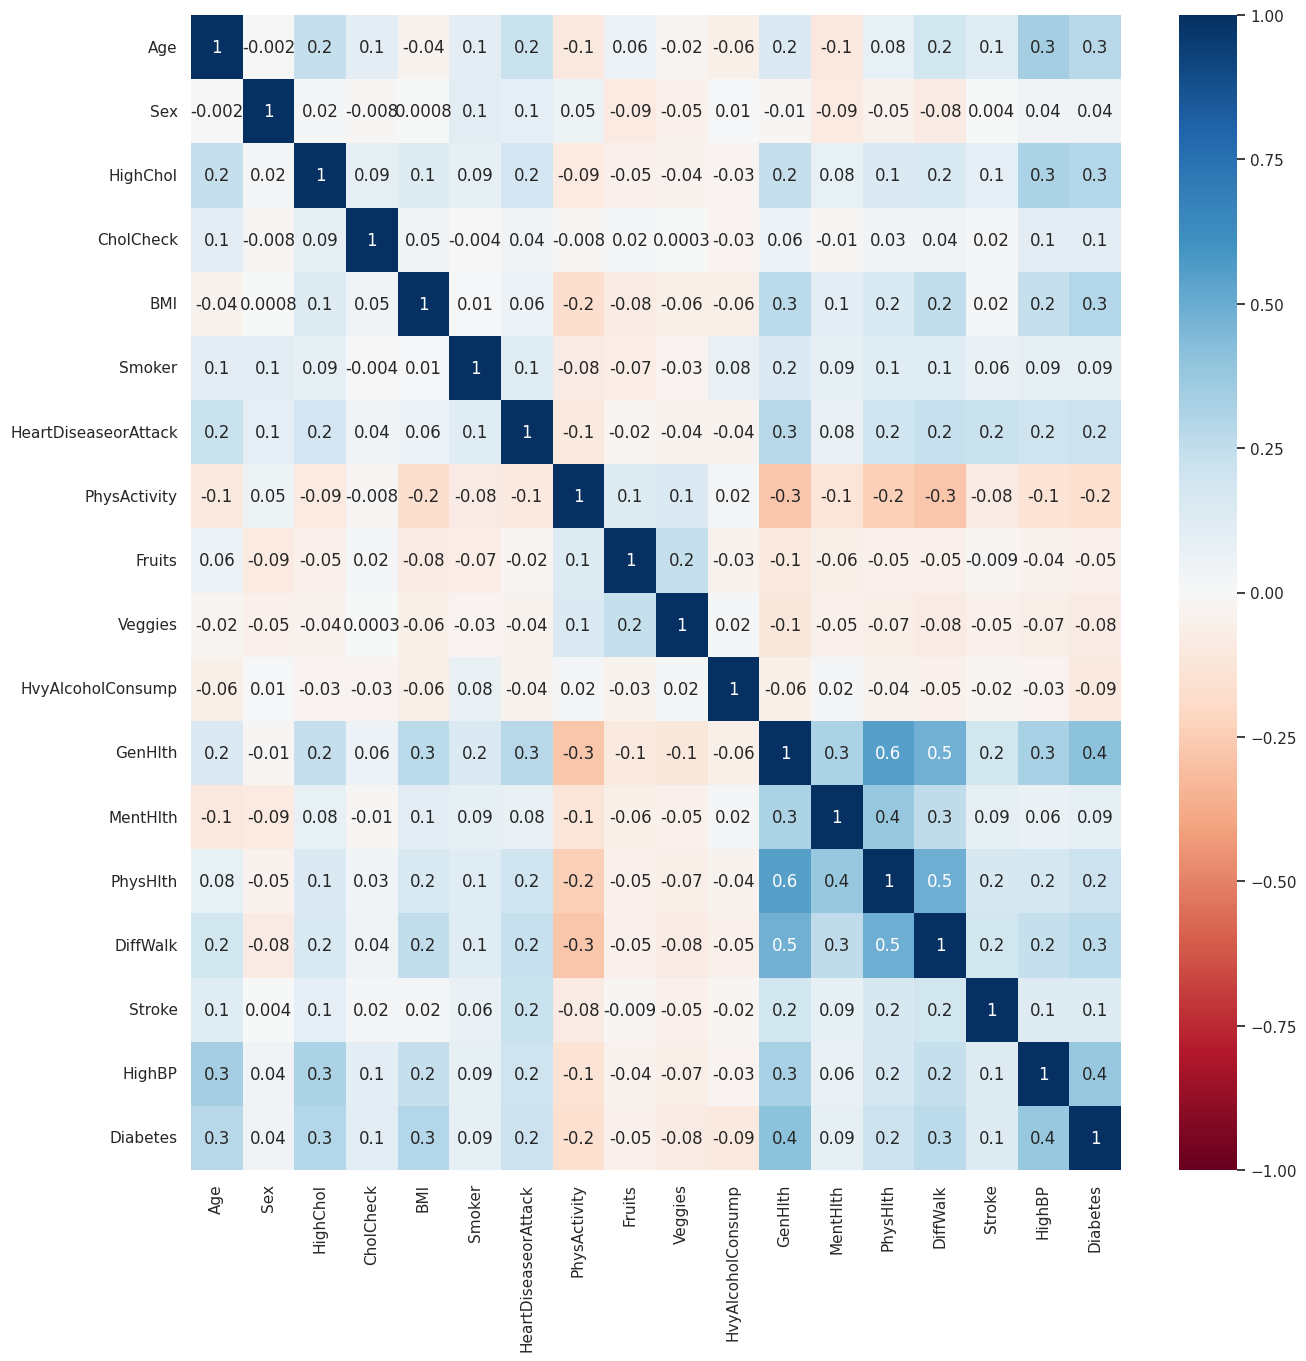

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'RdBu')

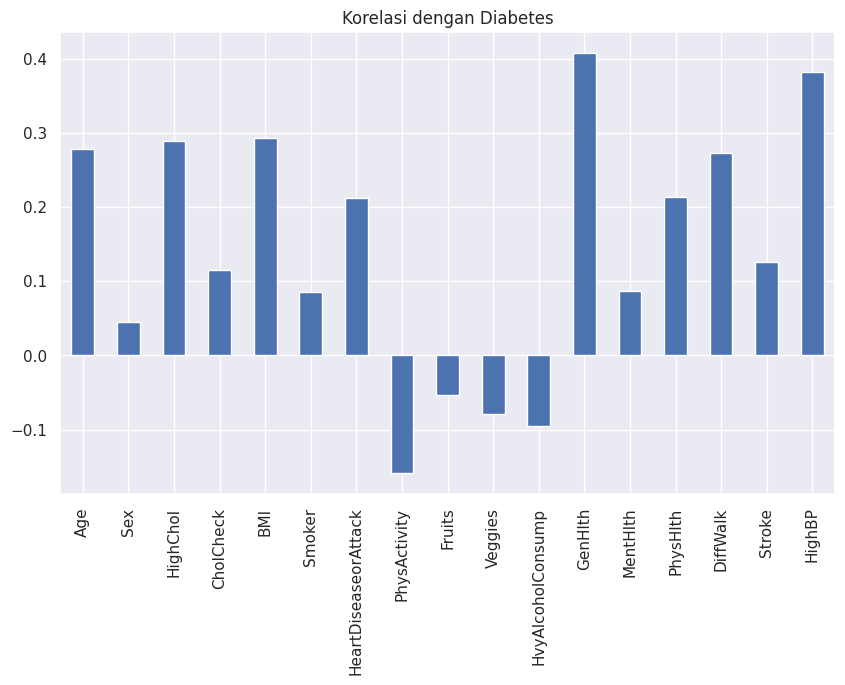

In [ ]:
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Korelasi dengan Diabetes");

<Figure size 500x500 with 0 Axes>

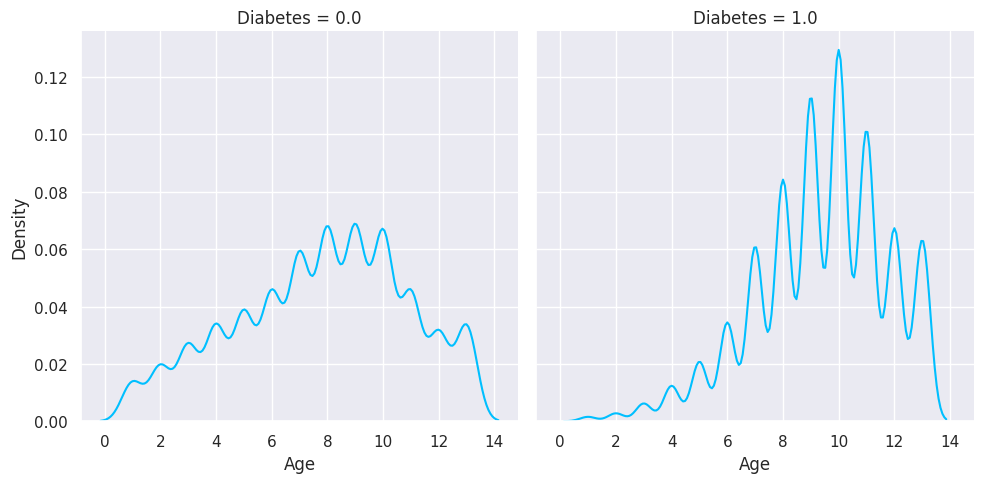

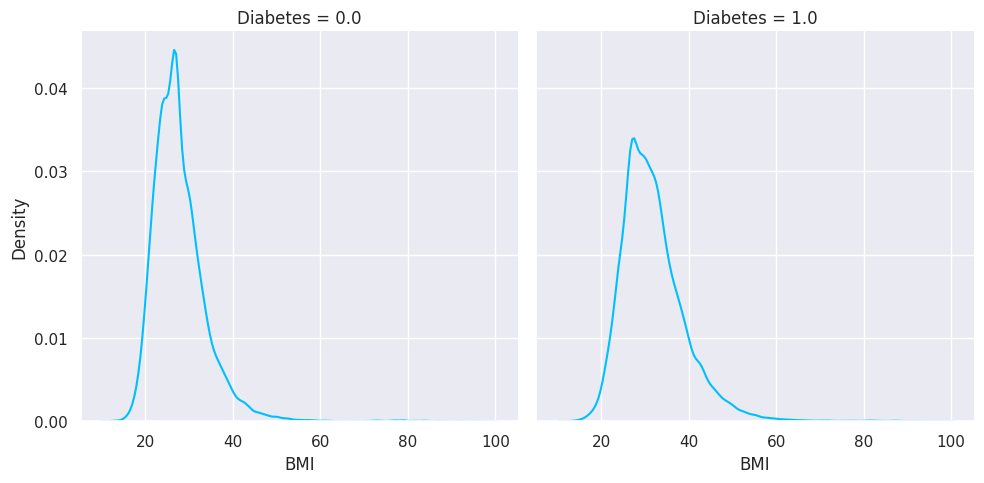

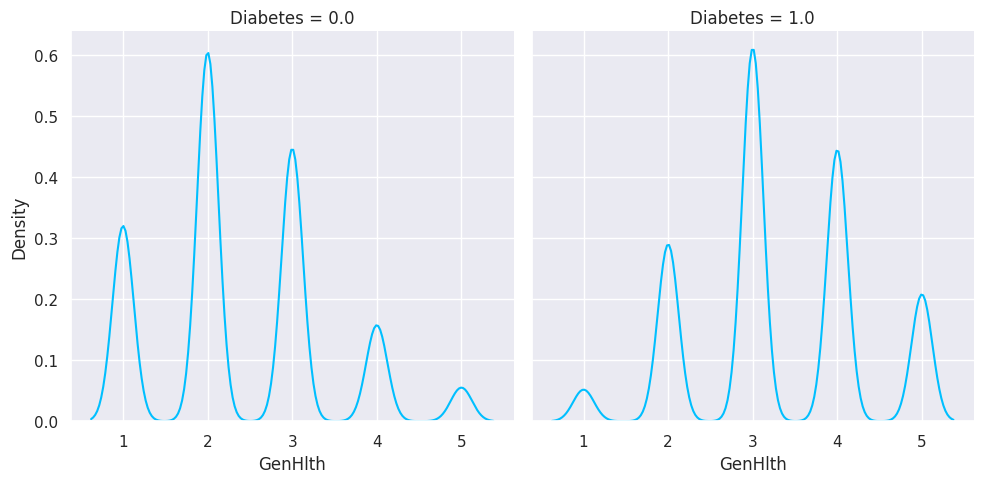

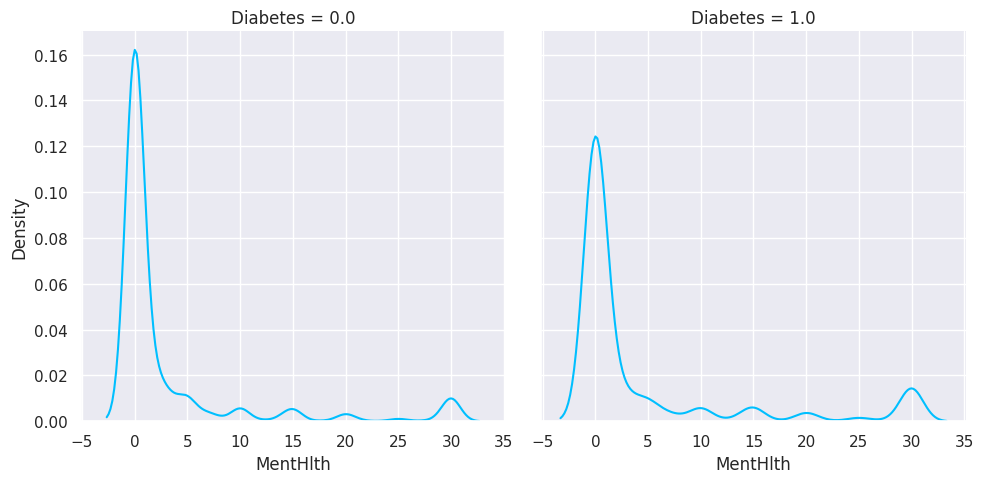

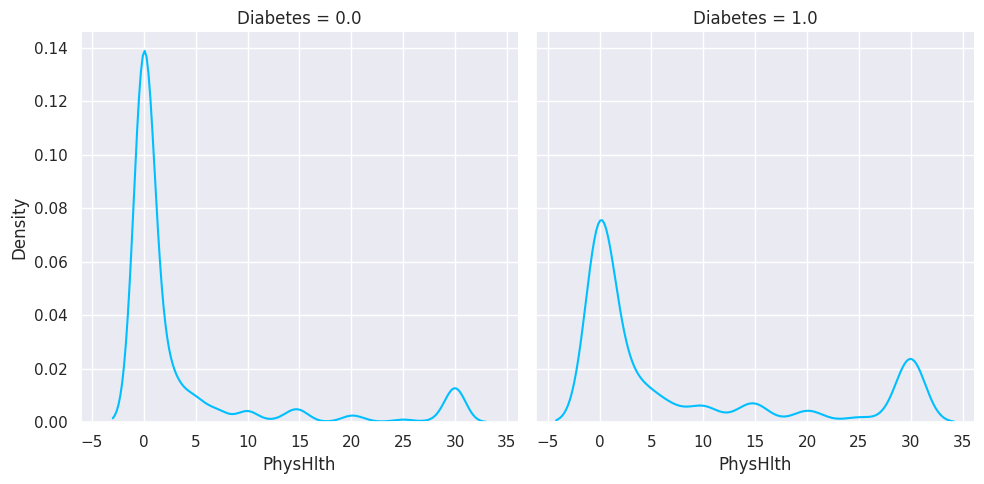

In [ ]:
columns = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
plt.figure(figsize=(5, 5))
for i, col in enumerate(columns):
    sns.displot(x=col, col='Diabetes' , data = df, kind="kde" ,color = 'deepskyblue')

plt.tight_layout()
plt.show()

In [ ]:
df_skew = df[['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75

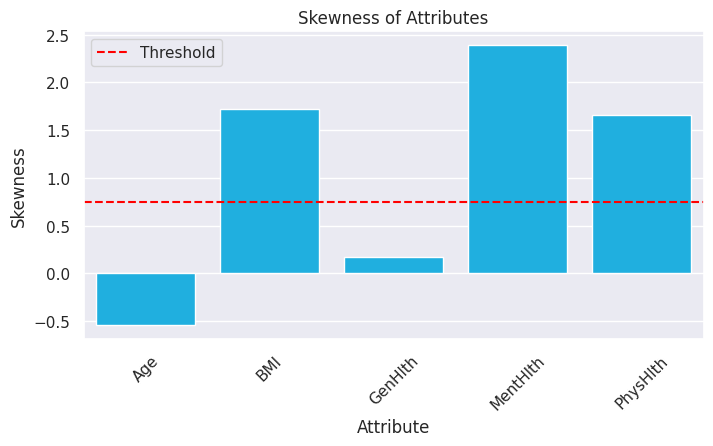

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=skew, x=skew.index, y='skew', color='deepskyblue')
plt.axhline(0.75, color='red', linestyle='--', label='Threshold')
plt.xlabel('Attribute')
plt.ylabel('Skewness')
plt.title('Skewness of Attributes')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# PREPROCESSING DAN DATA TRANSFORMATION

In [ ]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Menghapus baris dengan outlier pada kolom 'BMI'
df_filtered = df[
    (df['BMI'] >= lower_bound_bmi) & (df['BMI'] <= upper_bound_bmi)
]
print(df_filtered)


        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Stroke  HighBP  Diabetes
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0           1.0     0.0      1.0                0.0      3.0       5.0      30.0       0.0     0.0     1.0       0.0
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0           0.0     1.0      0.0                0.0      3.0       0.0       0.0       0.0     1.0     1.0       0.0
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0           1.0     1.0      1.0                0.0      1.0       0.0      10.0       0.0     0.0     0.0       0.0
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0           1.0     1.0      1.0                0.0      3.0       0.0       3.0       0.0     0.0     1.0       0.0
4       8.0  0.0       0.0        1.0  29.0     1.0    

In [115]:
print(df.shape)
print(df_filtered.shape)

(70692, 18)
(68511, 18)


In [119]:

Q1_phys_hlth = df_filtered['PhysHlth'].quantile(0.25)
Q3_phys_hlth = df_filtered['PhysHlth'].quantile(0.75)
IQR_phys_hlth = Q3_phys_hlth - Q1_phys_hlth
lower_bound_phys_hlth = Q1_phys_hlth - 1.5 * IQR_phys_hlth
upper_bound_phys_hlth = Q3_phys_hlth + 1.5 * IQR_phys_hlth

df_new = df_filtered[
    (df_filtered['PhysHlth'] >= lower_bound_phys_hlth) & (df_filtered['PhysHlth'] <= upper_bound_phys_hlth)
]
print(df_new)

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Stroke  HighBP  Diabetes
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0           0.0     1.0      0.0                0.0      3.0       0.0       0.0       0.0     1.0     1.0       0.0
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0           1.0     1.0      1.0                0.0      1.0       0.0      10.0       0.0     0.0     0.0       0.0
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0           1.0     1.0      1.0                0.0      3.0       0.0       3.0       0.0     0.0     1.0       0.0
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0           1.0     1.0      1.0                0.0      2.0       0.0       0.0       0.0     0.0     0.0       0.0
5       1.0  0.0       0.0        1.0  18.0     0.0    

In [120]:
print(df_filtered.shape)
print(df_new.shape)

(68511, 18)
(56049, 18)


In [122]:
Q1_bmi = df_new['BMI'].quantile(0.25)
Q3_bmi = df_new['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Menghapus baris dengan outlier pada kolom 'BMI'
df_new = df_new[
    (df_new['BMI'] >= lower_bound_bmi) & (df_new['BMI'] <= upper_bound_bmi)
]
print(df_new)

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Stroke  HighBP  Diabetes
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0           0.0     1.0      0.0                0.0      3.0       0.0       0.0       0.0     1.0     1.0       0.0
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0           1.0     1.0      1.0                0.0      1.0       0.0      10.0       0.0     0.0     0.0       0.0
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0           1.0     1.0      1.0                0.0      3.0       0.0       3.0       0.0     0.0     1.0       0.0
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0           1.0     1.0      1.0                0.0      2.0       0.0       0.0       0.0     0.0     0.0       0.0
5       1.0  0.0       0.0        1.0  18.0     0.0    

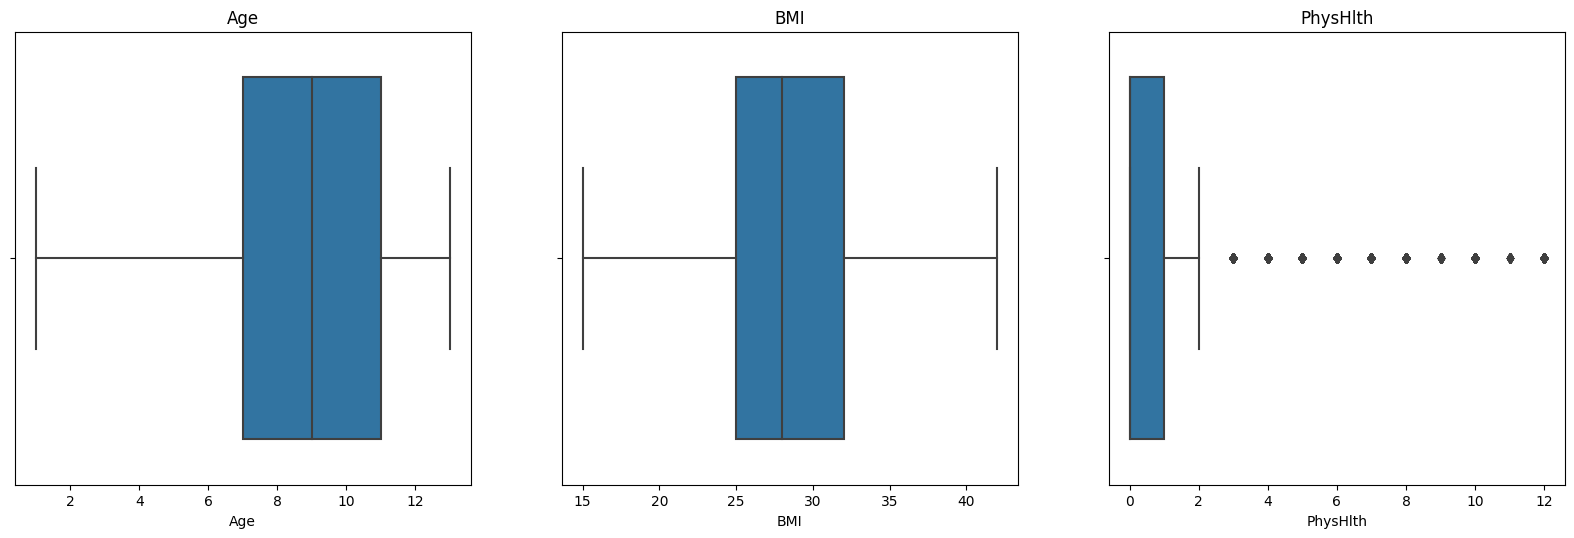

In [123]:
plt.figure(figsize=(20, 20))
columns = ['Age', 'BMI', 'PhysHlth']
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_new[col])
    plt.title(col)

In [86]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import boxcox

In [87]:
#transformasi logaritmik
df_log_t = df.copy()
df_log_t["BMI"] = np.log(df_log_t["BMI"])
df_log_t["PhysHlth"] += 0.001
df_log_t["MentHlth"] += 0.001
df_log_t["MentHlth"] = np.log(df_log_t["MentHlth"])
df_log_t["PhysHlth"] = np.log(df_log_t["PhysHlth"])

#transformasi akar
df_sqrt_t = df.copy()
df_sqrt_t["BMI"] = np.sqrt(df_sqrt_t["BMI"])
df_sqrt_t["MentHlth"] = np.sqrt(df_sqrt_t["MentHlth"])
df_sqrt_t["PhysHlth"] = np.sqrt(df_sqrt_t["PhysHlth"])

#transformasi box-cox
df_bc_t = df.copy()
df_bc_t["BMI"], _ = boxcox(df_bc_t["BMI"])
df_bc_t["MentHlth"] += 0.001
df_bc_t["MentHlth"], _ = boxcox(df_bc_t["MentHlth"])
df_bc_t["PhysHlth"] += 0.001
df_bc_t["PhysHlth"], _ = boxcox(df_bc_t["PhysHlth"])

#transformasi quantile
df_qt_t = df.copy()
qt = QuantileTransformer()
df_qt_t[['BMI']] = qt.fit_transform(df_qt_t[['BMI']])
df_qt_t[['MentHlth']] = qt.fit_transform(df_qt_t[['MentHlth']])
df_qt_t[['PhysHlth']] = qt.fit_transform(df_qt_t[['PhysHlth']])

df_qt500normal_t = df.copy()
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
df_qt500normal_t[['BMI']] = qt.fit_transform(df_qt500normal_t[['BMI']])
df_qt500normal_t[['MentHlth']] = qt.fit_transform(df_qt500normal_t[['MentHlth']])
df_qt500normal_t[['PhysHlth']] = qt.fit_transform(df_qt500normal_t[['PhysHlth']])

In [ ]:
features = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
df_skew = df[features]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['log'] = df_log_t[features].skew()
skew['sqrt'] = df_sqrt_t[features].skew()
skew['bc'] = df_bc_t[features].skew()
skew['qt'] = df_qt_t[features].skew()
skew['qt500normal'] = df_qt500normal_t[features].skew()
skew.T

,Age,BMI,GenHlth,MentHlth,PhysHlth
skew,-0.545923,1.719180,0.171991,2.388110,1.657304
log,-0.545923,0.536624,0.171991,0.844673,0.344840
sqrt,-0.545923,1.040742,0.171991,1.618683,1.092609
bc,-0.545923,-0.015435,0.171991,0.778292,0.295583
qt,-0.545923,0.012562,0.171991,0.843866,0.424356
qt500normal,-0.545923,-0.001274,0.171991,1.083289,0.691062


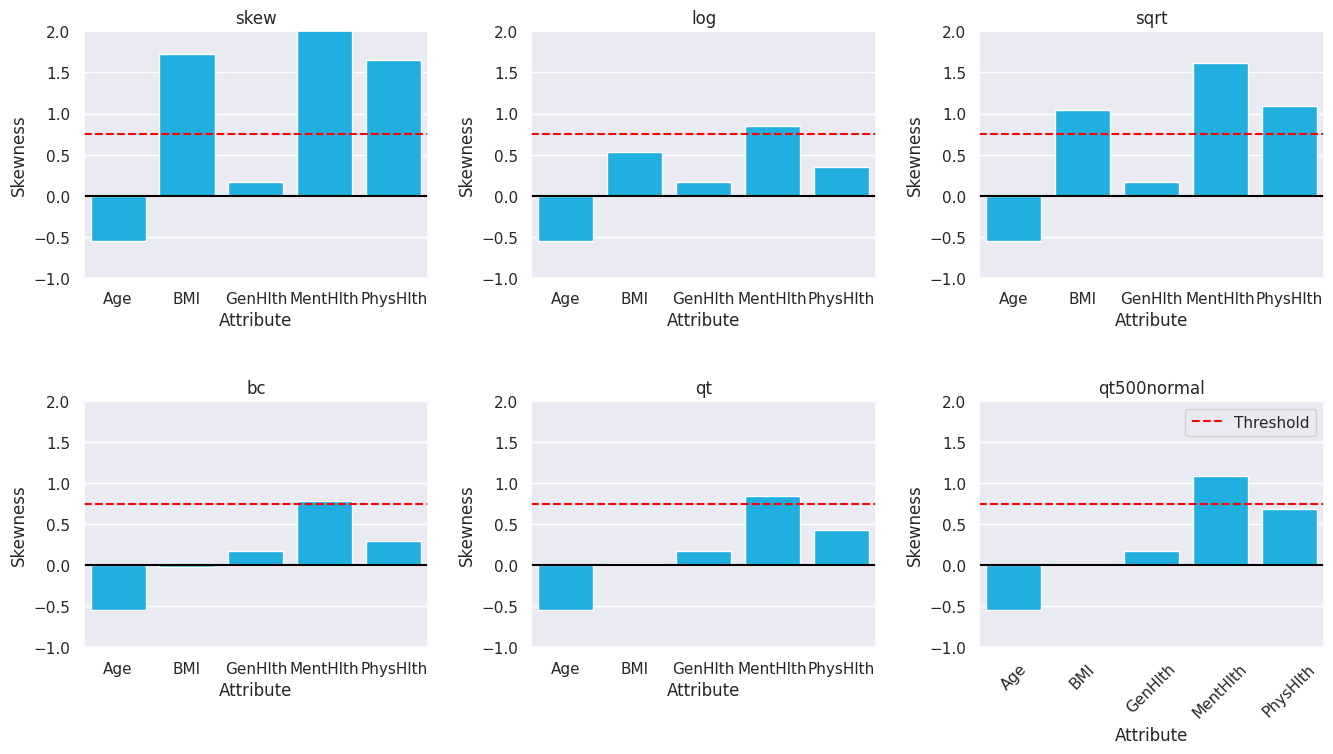

In [ ]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(skew.columns) :
  plt.subplot(2, 3, i+1)
  sns.barplot(data=skew, x=skew.index, y=col, color='deepskyblue')
  plt.axhline(0.75, color='red', linestyle='--', label='Threshold')
  plt.axhline(0, color='black',)
  plt.ylim(-1, 2)
  plt.xlabel('Attribute')
  plt.ylabel('Skewness')
  plt.title(col)
plt.legend()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x2000 with 0 Axes>

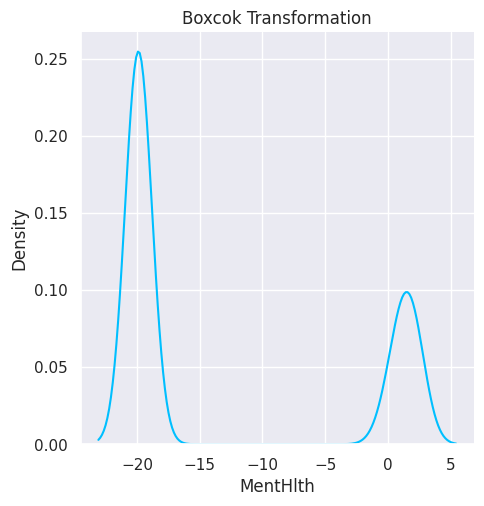

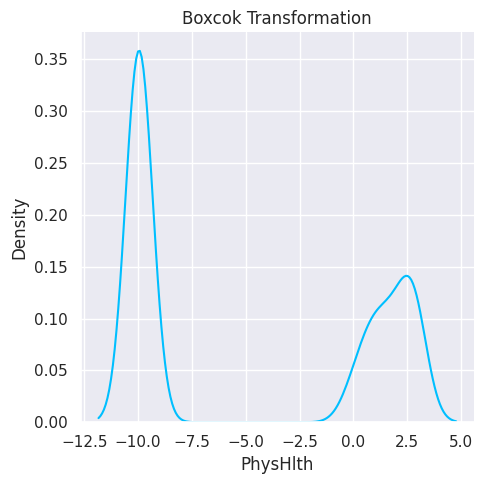

In [ ]:
columns = ['MentHlth', 'PhysHlth']

plt.figure(figsize=(20, 20))
for j, col in enumerate(columns):
    sns.displot(x=col, data=df_bc_t, kind="kde", color='deepskyblue')
    plt.title("Boxcok Transformation")

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

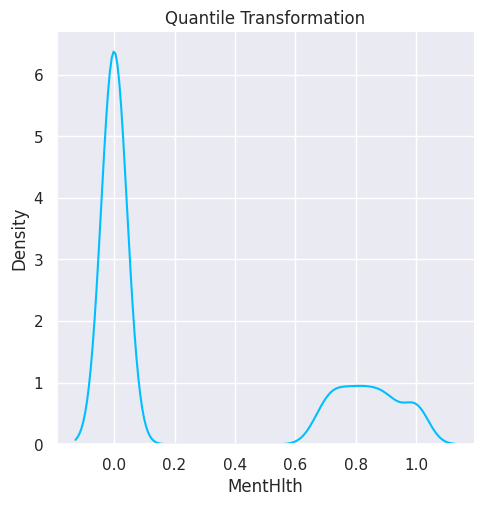

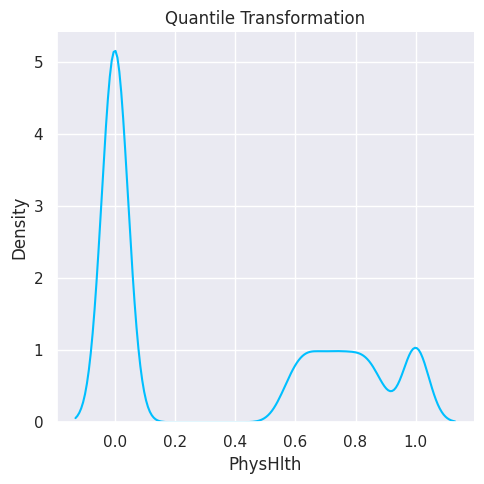

In [ ]:
plt.figure(figsize=(20, 20))
for j, col in enumerate(columns):
    sns.displot(x=col, data=df_qt_t, kind="kde", color='deepskyblue')
    plt.title("Quantile Transformation")

plt.tight_layout()
plt.show()

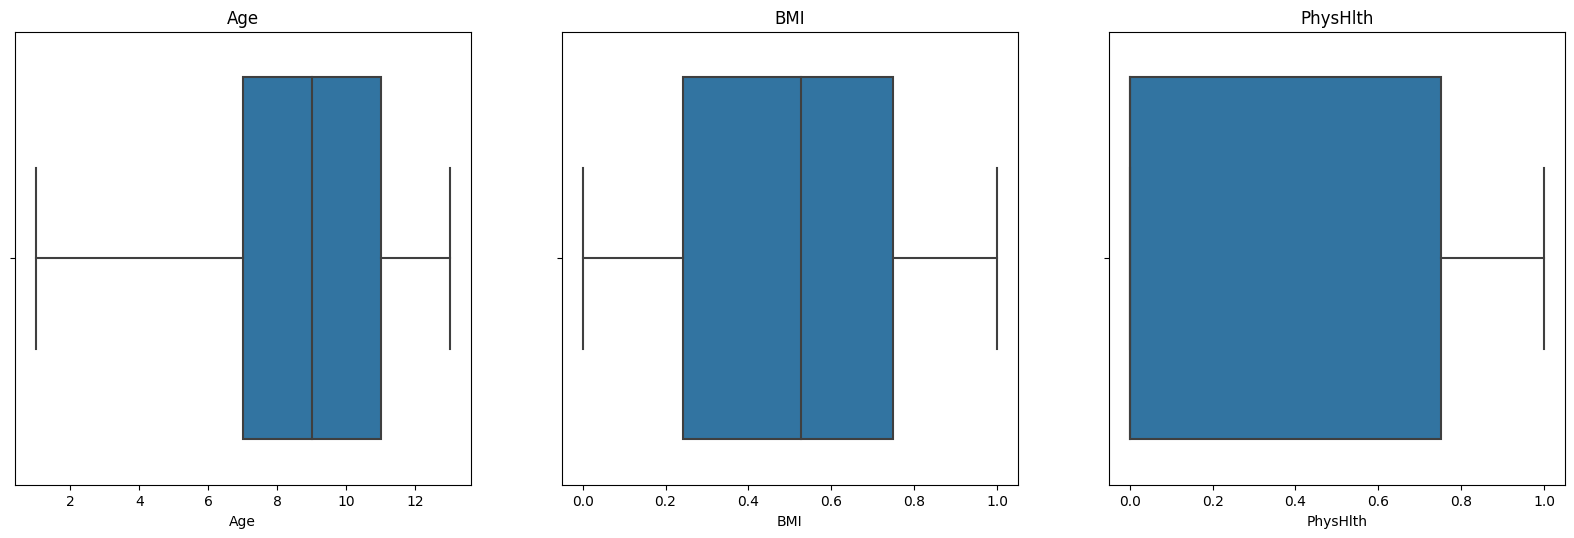

In [124]:
plt.figure(figsize=(20, 20))
columns = ['Age', 'BMI', 'PhysHlth']
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_qt_t[col])
    plt.title(col)

# FEATURE SELECTION

In [ ]:
dm = df.copy()

mms = MinMaxScaler()
dm[['Age']] = mms.fit_transform(dm[['Age']])
dm[['BMI']] = mms.fit_transform(dm[['BMI']])
dm[['GenHlth']] = mms.fit_transform(dm[['GenHlth']])
dm[['MentHlth']] = mms.fit_transform(dm[['MentHlth']])
dm[['PhysHlth']] = mms.fit_transform(dm[['PhysHlth']])
dm.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.250000,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.166667,1.000000,0.0,0.0,1.0,0.0
1,0.916667,1.0,1.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.000000,0.000000,0.0,1.0,1.0,0.0
2,1.000000,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.333333,0.0,0.0,0.0,0.0
3,0.833333,1.0,1.0,1.0,0.186047,1.0,0.0,1.0,1.0,1.0,0.0,0.50,0.000000,0.100000,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.0,1.0,0.197674,1.0,0.0,1.0,1.0,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
X = dm.drop(['Sex','Fruits', 'Veggies', 'Diabetes'], axis=1)
y = (dm['Diabetes']).astype(int)

### SelectKBest

In [ ]:
kbest = SelectKBest(score_func=chi2, k='all')
feature = kbest.fit(X, y)

                   Specs        Score
13                HighBP  4491.799960
11              DiffWalk  3926.865331
1               HighChol  2804.501278
5   HeartDiseaseorAttack  2695.401378
8                GenHlth  1981.980736
10              PhysHlth  1864.301775
12                Stroke  1042.976337
7      HvyAlcoholConsump   608.852980
6           PhysActivity   528.494034
0                    Age   490.930094
9               MentHlth   316.385175
4                 Smoker   274.340616
3                    BMI   200.502204
2              CholCheck    23.284293


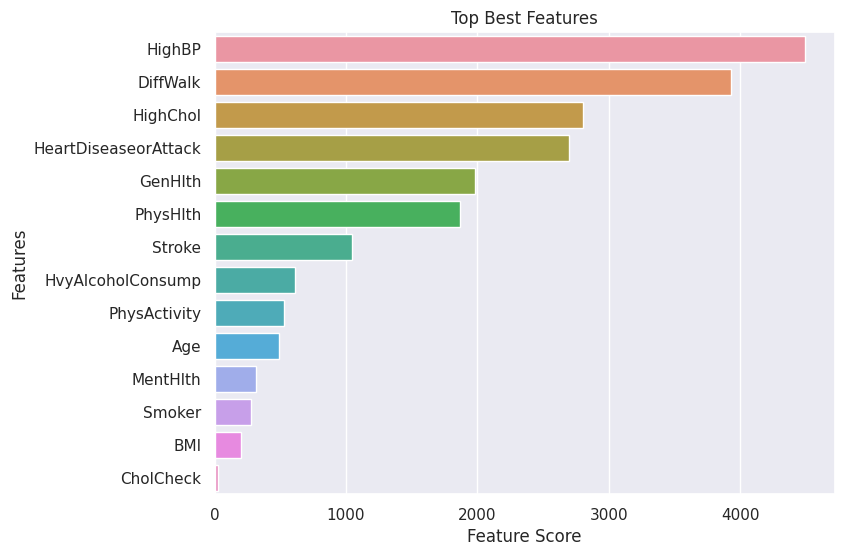

In [ ]:
dfscores = pd.DataFrame(feature.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(15,'Score'))

plt.figure(figsize=(8, 6))
sns.barplot(x='Score', y='Specs', data=featureScores.nlargest(15, 'Score'))
plt.xlabel('Feature Score')
plt.ylabel('Features')
plt.title('Top Best Features')
plt.show()

### Linear Regresi

In [ ]:
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=1)
feature2 = rfe.fit(X, y)

1
[False False False  True False False False False False False False False
 False False]
[ 3  7  4  1 14  8 13  6  2 12  9 11 10  5]


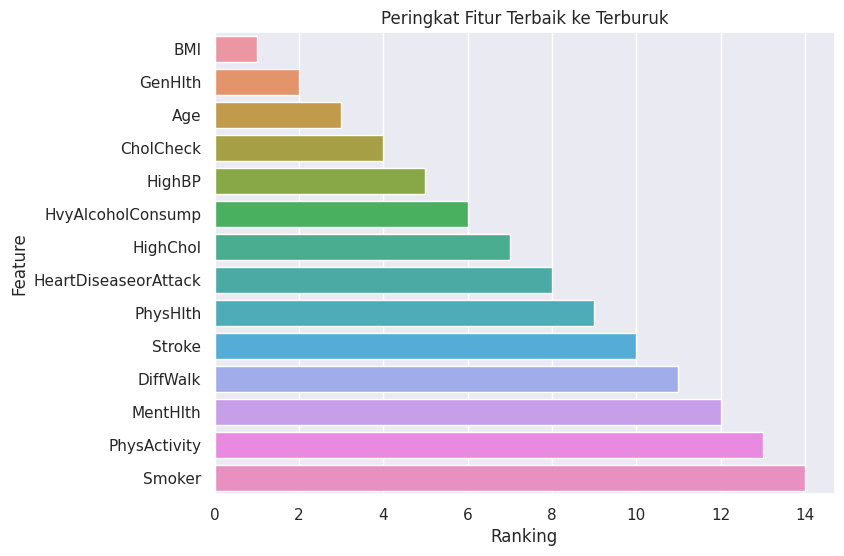

In [ ]:
print(feature2.n_features_)
print(feature2.support_)
print(feature2.ranking_)

# Membuat DataFrame dari peringkat fitur
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': feature2.ranking_})

# Mengurutkan peringkat fitur dari terbaik ke terburuk
sorted_ranking = feature_ranking.sort_values(by='Ranking')

# Memvisualkan peringkat fitur menggunakan barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Ranking', y='Feature', data=sorted_ranking)
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Peringkat Fitur Terbaik ke Terburuk')
plt.show()

In [ ]:
# from joblib import dump

# dump(model_lr, '/content/drive/MyDrive/kuliah/DataMining/DiabetesMelitus/model/model_lr.joblib')

In [ ]:
# best_subset_indices = model_lr.best_idx_
# best_subset_names = X.columns[list(best_subset_indices)]
# best_accuracy_score = model_lr.best_score_

# df_scores = pd.DataFrame({'Features': best_subset_names, 'Score': best_accuracy_score})

# plt.figure(figsize=(8, 6))
# sns.barplot(x='Score', y='Features', data=df_scores)
# plt.xlabel('Score')
# plt.ylabel('Features')
# plt.title('Top Selected Features')
# plt.show()

In [ ]:
# print('Best accuracy score: %.2f' % model_lr.best_score_)
# print('Best subset (indices):', model_lr.best_idx_)
# print('Best subset (corresponding names):', model_lr.best_feature_names_)

In [ ]:
# best_subset_indices = model_lr.get_metric_dict()[max(model_lr.get_metric_dict(), key=lambda x: model_lr.get_metric_dict()[x]['avg_score'])]['feature_idx']
# best_subset_names = X.columns[list(best_subset_indices)]
# best_accuracy_score = model_lr.get_metric_dict()[max(model_lr.get_metric_dict(), key=lambda x: model_lr.get_metric_dict()[x]['avg_score'])]['avg_score']

# df_scores = pd.DataFrame({'Features': best_subset_names, 'Score': best_accuracy_score})


# df_scores = df_scores.sort_values('Score', ascending=False)

# plt.figure(figsize=(8, 6))
# sns.barplot(x='Score', y='Features', data=df_scores)
# plt.xlabel('Score')
# plt.ylabel('Features')
# plt.title('Top Best Features')
# plt.show()

In [125]:
df_copy = df.copy()
df.drop(['Sex','CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


# MODEL

### spliting data

In [ ]:
df.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [127]:
print(df.drop('Diabetes', axis=1).duplicated(keep=False).sum())
print(df.drop('Diabetes', axis=1).duplicated().sum())

41536
32786


In [128]:
mms = MinMaxScaler()
df[['Age']] = mms.fit_transform(df[['Age']])
df[['BMI']] = mms.fit_transform(df[['BMI']])
df[['GenHlth']] = mms.fit_transform(df[['GenHlth']])
df[['PhysHlth']] = mms.fit_transform(df[['PhysHlth']])
df.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.250000,0.0,0.162791,0.0,1.0,3.0,1.000000,0.0,0.0,1.0,0.0
1,0.916667,1.0,0.162791,0.0,0.0,3.0,0.000000,0.0,1.0,1.0,0.0
2,1.000000,0.0,0.162791,0.0,1.0,1.0,0.333333,0.0,0.0,0.0,0.0
3,0.833333,1.0,0.186047,0.0,1.0,3.0,0.100000,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.197674,0.0,1.0,2.0,0.000000,0.0,0.0,0.0,0.0


In [129]:
X = df.drop(['Diabetes'], axis=1)
y = (df['Diabetes']).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train = {X_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')
print(X.columns)

X_train = (56553, 10)
X_test = (14139, 10)
y_train = (56553,)
y_test = (14139,)
Index(['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP'],
      dtype='object')


In [131]:
print(f'Proportion of y_train:')
print(y_train.value_counts())

print(f'Proportion of y_test:')
print(y_test.value_counts())

Proportion of y_train:
1    28277
0    28276
Name: Diabetes, dtype: int64
Proportion of y_test:
0    7070
1    7069
Name: Diabetes, dtype: int64


### fungsi manual

In [ ]:
def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

    # Menghitung skor rata-rata dan interval kepercayaan
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Membuat plot kurva pembelajaran
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

    plt.title('Learning Curve')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

### Decision Tree

In [133]:
dt = DecisionTreeClassifier()

param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]
}


grid_search_dt = GridSearchCV(dt, param_dt, cv=5, n_jobs=-1)

grid_search_dt.fit(X, y)

print(grid_search_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}


In [135]:
best_params_dt = grid_search_dt.best_params_
model_dt = DecisionTreeClassifier(**best_params_dt)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

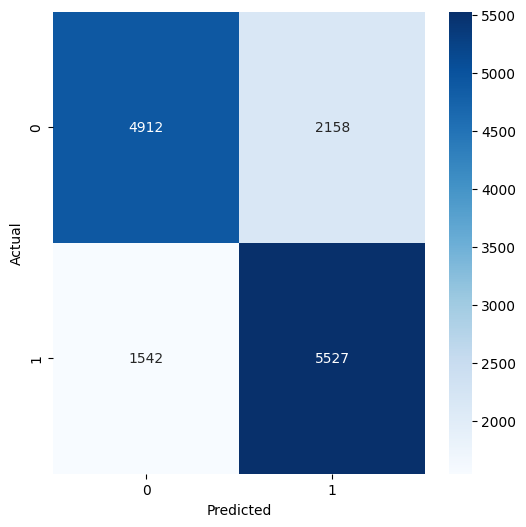


Confusion Matrix DecisionTree
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      7070
           1       0.72      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

Accuracy: 0.7383124690572176
AUC: 0.8110770115469199


In [136]:
y_pred_dt = model_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)
y_scores = model_dt.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred_dt)
print()
print("Confusion Matrix DecisionTree")
print(report)

print("Accuracy:", accuracy)
print("AUC:", auc)

In [ ]:
model_path = '/content/drive/MyDrive/kuliah/DataMining/DiabetesMelitus/model/model_grid_dt.pkl'
joblib.dump(grid_search_dt, model_path)

dir_path = os.path.dirname(model_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

loaded_model_dt = joblib.load(model_path)

In [ ]:
model_path = '/content/drive/MyDrive/kuliah/DataMining/DiabetesMelitus/model/model_grid_dt.pkl'
grid_search_dt = joblib.load(model_path)

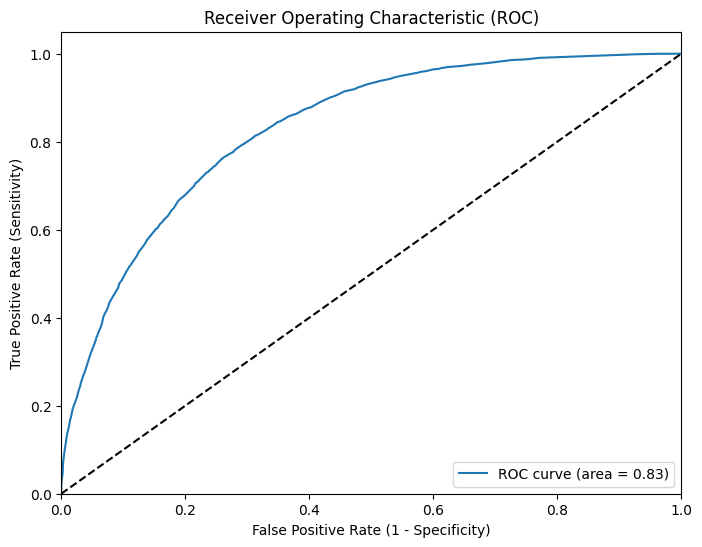

In [ ]:
y_pred_prob = grid_search_dt.predict_proba(X_test)[:, 1]

# Menghitung nilai false positive rate (FPR), true positive rate (TPR), dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Menghitung area under curve (AUC)
roc_auc = auc(fpr, tpr)

# Menampilkan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("Nilai AUC: {:.2f}".format(auc_score))

Nilai AUC: 0.83


In [ ]:
y_pred = grid_seach_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: ", accuracy)

Akurasi:  0.7506895820072141


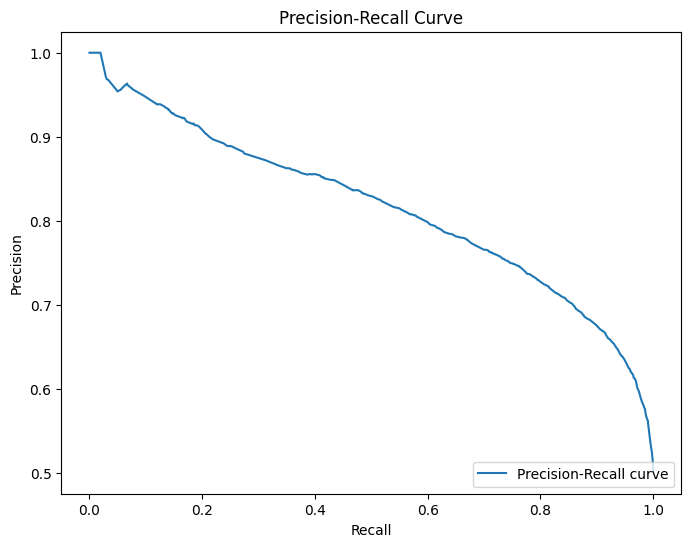

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Menampilkan kurva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
grid_result_dt = pd.DataFrame(grid_search_dt.cv_results_)

sorted_grid_result_dt = grid_result_dt.sort_values('mean_test_score', ascending=False)
sorted_grid_result_dt[['param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_random_state', 'mean_test_score']].head()

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_random_state,mean_test_score
407,entropy,10,sqrt,2,10,42,0.737962
425,entropy,10,log2,2,10,42,0.737962
139,gini,10,sqrt,4,2,42,0.737891
141,gini,10,sqrt,4,5,42,0.737891
157,gini,10,log2,4,2,42,0.737891


In [ ]:
best_params_dt = grid_search_dt.best_params_
model_dt = DecisionTreeClassifier(**best_params_dt)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

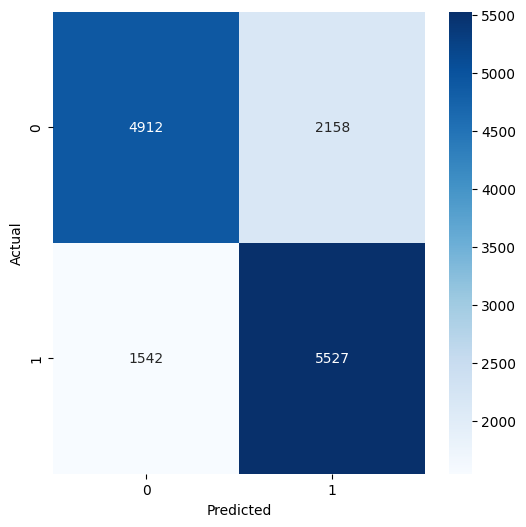


Confusion Matrix DecisionTree
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      7070
           1       0.72      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

Accuracy: 0.7383124690572176
AUC: 0.8110770115469199


In [ ]:
y_pred_dt = model_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)
y_scores = model_dt.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred_dt)
print()
print("Confusion Matrix DecisionTree")
print(report)

print("Accuracy:", accuracy)
print("AUC:", auc)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# Melakukan cross-validation
scores = cross_val_score(model_dt, X, y, cv=kf, scoring='accuracy')

# Mencetak hasil evaluasi performa model pada setiap fold
for i, score in enumerate(scores):
    print("Fold", i+1, ":", score)

# Menghitung rata-rata performa model
mean_score = scores.mean()
print("Rata-rata performa:", mean_score)

Fold 1 : 0.6492220650636492
Fold 2 : 0.6173974540311173
Fold 3 : 0.6524260857264111
Fold 4 : 0.6370066487480549
Fold 5 : 0.6628943273447446
Fold 6 : 0.7012307257037771
Fold 7 : 0.7305135096901967
Fold 8 : 0.6979770830386193
Fold 9 : 0.7276842551987551
Fold 10 : 0.733059838732494
Rata-rata performa: 0.6809411993277819


In [ ]:
# Definisikan model Decision Tree
model = DecisionTreeClassifier(**best_params_dt)

# Lakukan validasi silang dengan 10 fold
scores = cross_val_score(model, X, y, cv=10)

# Hitung skor rata-rata pada data pelatihan
train_score = scores.mean()

# Train model pada seluruh data pelatihan
model.fit(X, y)

# Evaluasi model pada data pengujian
test_score = model.score(X_test, y_test)

# Cetak skor kinerja
print("Rata-rata skor kinerja pada data pelatihan:", train_score)
print("Skor kinerja pada data pengujian:", test_score)

# Periksa apakah terdapat overfitting
if train_score > test_score:
    print("Model mengalami overfitting")
else:
    print("Model tidak mengalami overfitting")


Rata-rata skor kinerja pada data pelatihan: 0.7363354031177425
Skor kinerja pada data pengujian: 0.7506895820072141
Model tidak mengalami overfitting


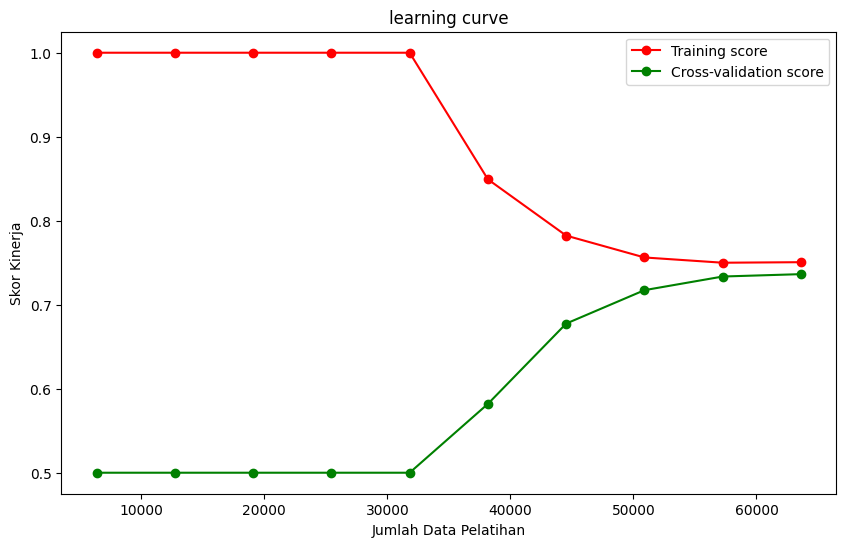

In [ ]:
# Definisikan model Decision Tree
model = DecisionTreeClassifier(**best_params_dt)

# Hitung kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))

# Hitung skor rata-rata pada setiap fold
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot kurva pembelajaran
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Jumlah Data Pelatihan")
plt.ylabel("Skor Kinerja")
plt.title("learning curve")
plt.legend(loc="best")
plt.show()

In [ ]:
print("Skor Kinerja pada Data Pelatihan:")
for i, train_size in enumerate(train_sizes):
    print("Jumlah Data Pelatihan:", train_size)
    print("   Fold", i+1, ":", train_scores[i])

print("Skor Kinerja pada Data Validasi:")
for i, train_size in enumerate(train_sizes):
    print("Jumlah Data Pelatihan:", train_size)
    print("   Fold", i+1, ":", test_scores[i])

Skor Kinerja pada Data Pelatihan:
Jumlah Data Pelatihan: 6362
   Fold 1 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Jumlah Data Pelatihan: 12724
   Fold 2 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Jumlah Data Pelatihan: 19086
   Fold 3 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Jumlah Data Pelatihan: 25448
   Fold 4 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Jumlah Data Pelatihan: 31811
   Fold 5 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Jumlah Data Pelatihan: 38173
   Fold 6 : [0.84923899 0.84984151 0.84745763 0.84884604 0.84931758 0.84942237
 0.8499463  0.84999869 0.84984151 0.84855788]
Jumlah Data Pelatihan: 44535
   Fold 7 : [0.78111598 0.78250814 0.7807118  0.78201415 0.78329404 0.78075671
 0.78430448 0.78226114 0.78226114 0.78338386]
Jumlah Data Pelatihan: 50897
   Fold 8 : [0.75774604 0.75778533 0.75519186 0.75360041 0.75452384 0.75782463
 0.75393442 0.75825687 0.75641    0.7572745 ]
Jumlah Data Pelatihan: 57259
   Fold 9 : [0.75284235 0.75348853 0.74795229 0.75195166 0.74636302 0.75013535
 0.7500131  0.74973367 0.7495764

In [ ]:
feature_importance = model_dt.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cetak DataFrame hasil
print(importance_df)

                Feature  Importance
2                   BMI    0.263529
5               GenHlth    0.262837
0                   Age    0.152287
9                HighBP    0.134634
7              DiffWalk    0.089262
1              HighChol    0.052196
6              PhysHlth    0.018549
3  HeartDiseaseorAttack    0.015990
8                Stroke    0.007657
4          PhysActivity    0.003060


In [ ]:
best_model = grid_search_dt.best_estimator_

# Mendapatkan feature importance dari model terbaik
feature_importance = best_model.feature_importances_

# Buat DataFrame untuk menampilkan hasil
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cetak DataFrame hasil
print(importance_df)

                Feature  Importance
5               GenHlth    0.302543
2                   BMI    0.254892
0                   Age    0.148000
9                HighBP    0.141274
1              HighChol    0.059825
7              DiffWalk    0.053429
6              PhysHlth    0.014542
3  HeartDiseaseorAttack    0.013945
4          PhysActivity    0.005958
8                Stroke    0.005592


In [ ]:
y_pred_prob_dt = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### KNN

In [ ]:
param_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [30, 40, 50],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X, y)

print(grid_search_knn.best_params_)

y_pred = grid_search_knn.predict(X_test)
print(classification_report(y_test, y_pred))

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      7070
           1       0.78      0.69      0.73      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [ ]:
model_path = '/content/drive/MyDrive/kuliah/DataMining/DiabetesMelitus/model/model_grid_knn.pkl'
joblib.dump(grid_search_knn, model_path)

dir_path = os.path.dirname(model_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

loaded_model_knn = joblib.load(model_path)

NameError: ignored

In [ ]:
grid_result_knn = pd.DataFrame(grid_search_knn.cv_results_)

sorted_grid_result_knn = grid_result_knn.sort_values('mean_test_score', ascending=False)
sorted_grid_result_knn[['param_n_neighbors', 'param_weights', 'param_algorithm', 'param_p', 'param_leaf_size', 'param_metric', 'mean_test_score']].head()

,param_n_neighbors,param_weights,param_algorithm,param_p,param_leaf_size,param_metric,mean_test_score
494,10,uniform,brute,2,40,euclidean,0.712995
492,10,uniform,brute,1,40,euclidean,0.712995
446,10,uniform,brute,2,30,euclidean,0.712995
444,10,uniform,brute,1,30,euclidean,0.712995
540,10,uniform,brute,1,50,euclidean,0.712995


In [ ]:
best_params_knn = grid_search_knn.best_params_
model_knn = KNeighborsClassifier(**best_params_knn)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=10, p=1)

In [ ]:
y_pred_knn = model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
y_scores = model_knn.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred_knn)
print()
print("Confusion Matrix KNN")
print(report)

print("Accuracy:", accuracy)
print("AUC:", auc)

NameError: ignored

### SVM

In [ ]:
param_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'random_state': [42]
}

grid_search_svm = GridSearchCV(SVC(), param_svm, cv=5, n_jobs=-1)

print(grid_search_svm.best_params_)

y_pred = grid_search_svm.predict(X_test)
print(classification_report(y_test, y_pred))

AttributeError: ignored

In [ ]:
model_path = '/content/drive/MyDrive/kuliah/DataMining/DiabetesMelitus/model/model_grid_svm.pkl'
joblib.dump(grid_search_svm, model_path)

dir_path = os.path.dirname(model_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

loaded_model_svm = joblib.load(model_path)

In [ ]:
grid_result_svm = pd.DataFrame(grid_search_svm.cv_results_)

sorted_grid_result_svm = grid_result_svm.sort_values('mean_test_score', ascending=False)
sorted_grid_result_svm[['param_C', 'param_kernel', 'param_gamma', 'param_degree', 'param_random_state', 'mean_test_score']].head()

In [ ]:
best_params_svm = grid_search_svm.best_params_
model_svm = SVC(**best_params_svm)
model_svm.fit(X_train, y_train)

In [ ]:
y_pred_svm = model_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)
y_scores = model_svm.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred_svm)
print()
print("Confusion Matrix SVM")
print(report)

print("Accuracy:", accuracy)
print("AUC:", auc)

### Random Forest

In [ ]:
model_rf = RandomForestClassifier()

param_rf =  {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

grid_search_rf = GridSearchCV(model_rf, param_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X, y)

print(grid_search_rf.best_params_)

y_pred = grid_search_rf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
model_path = '/content/drive/MyDrive/kuliah/DataMining/DiabetesMelitus/model/model_grid_rf.pkl'
joblib.dump(grid_search_rf, model_path)

dir_path = os.path.dirname(model_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

loaded_model_rf = joblib.load(model_path)

In [ ]:
grid_result_rf = pd.DataFrame(grid_search_rf.cv_results_)

sorted_grid_result_rf = grid_result_rf.sort_values('mean_test_score', ascending=False)
sorted_grid_result_rf[['param_n_estimators','param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_random_state', 'mean_test_score']].head()

In [ ]:
best_params_rf = grid_search_rf.best_params_
model_rf = RandomForestClassifier(**best_params_rf)
model_rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
y_scores = model_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred_rf)
print()
print("Confusion Matrix SVM")
print(report)

print("Accuracy:", accuracy)
print("AUC:", auc)

# MODEL NO OUTLIER

In [163]:
df_new.drop(['Sex','CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth'], axis=1, inplace=True)
df_new.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,18.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [160]:
X_2 = df_new.drop(['Diabetes'], axis=1)
y_2 = (df_new['Diabetes']).astype(int)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)

print(f'X_train_2 = {X_train_2.shape}')
print(f'X_test_2 = {X_test_2.shape}')
print(f'y_train_2 = {y_train_2.shape}')
print(f'y_test_2 = {y_test_2.shape}')
print(X_2.columns)

X_train_2 = (44044, 10)
X_test_2 = (11012, 10)
y_train_2 = (44044,)
y_test_2 = (11012,)
Index(['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP'],
      dtype='object')


In [161]:
print(f'Proportion of y_train:')
print(y_train_2.value_counts())

print(f'Proportion of y_test:')
print(y_test_2.value_counts())

Proportion of y_train:
0    24585
1    19459
Name: Diabetes, dtype: int64
Proportion of y_test:
0    6147
1    4865
Name: Diabetes, dtype: int64


### DT

In [165]:
dt = DecisionTreeClassifier()

param_dt_2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]
}


grid_search_dt_2 = GridSearchCV(dt, param_dt_2, cv=5, n_jobs=-1)

grid_search_dt_2.fit(X, y)

print(grid_search_dt_2.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}


In [166]:
best_params_dt = grid_search_dt_2.best_params_
model_dt_2 = DecisionTreeClassifier(**best_params_dt)
model_dt_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

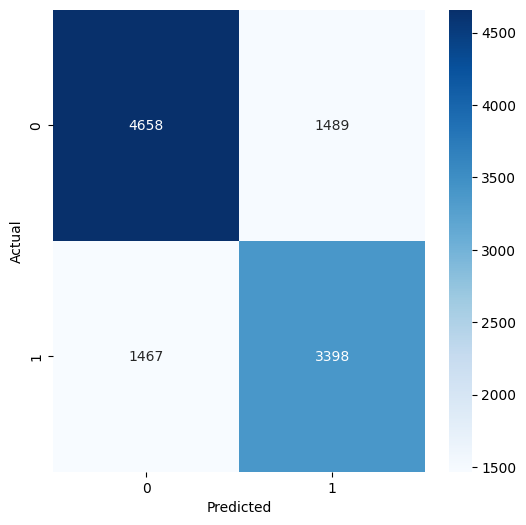


Confusion Matrix DecisionTree
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6147
           1       0.70      0.70      0.70      4865

    accuracy                           0.73     11012
   macro avg       0.73      0.73      0.73     11012
weighted avg       0.73      0.73      0.73     11012

Accuracy: 0.7315655648383581
AUC: 0.8055111568557327


In [167]:
y_pred_dt_2 = model_dt_2.predict(X_test_2)
cm = confusion_matrix(y_test_2, y_pred_dt_2)
accuracy = accuracy_score(y_test_2, y_pred_dt_2)
y_scores = model_dt_2.predict_proba(X_test_2)[:, 1]
auc = roc_auc_score(y_test_2, y_scores)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test_2, y_pred_dt_2)
print()
print("Confusion Matrix DecisionTree")
print(report)

print("Accuracy:", accuracy)
print("AUC:", auc)

In [175]:
mulai = time.time()
scores_model_dt_2 = cross_val_score(model_dt_2, X_2, y_2, cv=10)
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_model_dt_2.mean(), scores_model_dt_2.std() * 2, waktu))

Accuracy Decision Tree: 0.73 (+/- 0.01), Waktu = 0.365 detik


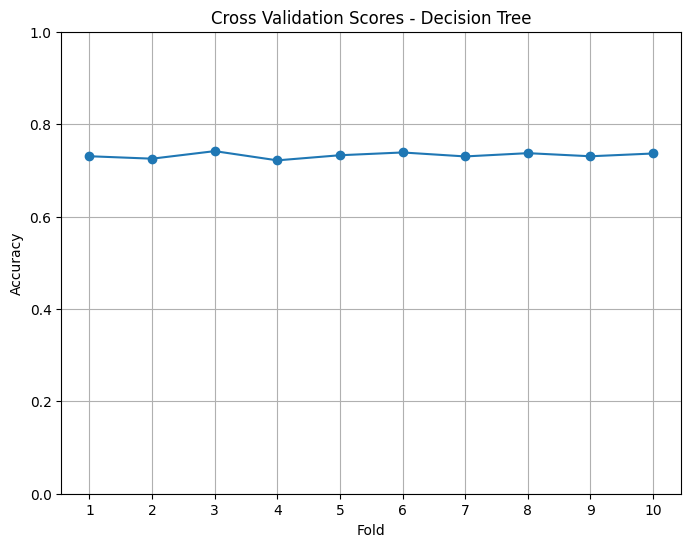

In [173]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11), scores_model_dt_2, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores - Decision Tree')
plt.ylim(0, 1)
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

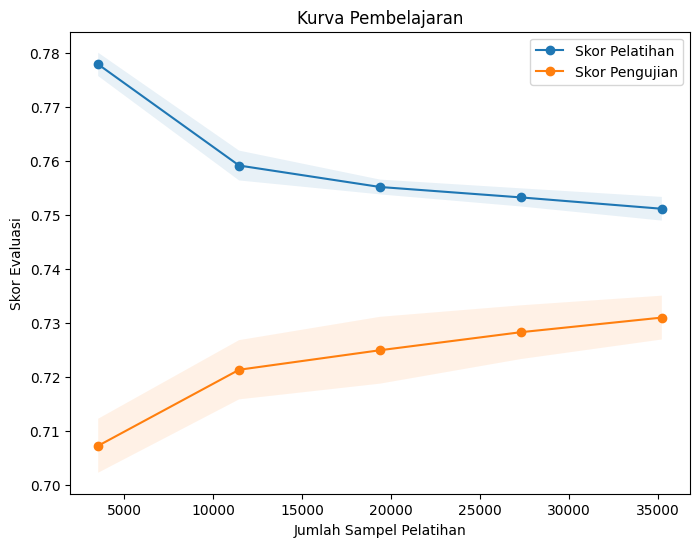

In [174]:
train_sizes, train_scores, test_scores = learning_curve(model_dt_2, X_train_2, y_train_2, cv=5)

# Menghitung rata-rata dan standar deviasi skor evaluasi pada setiap ukuran data pelatihan
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Menampilkan kurva pembelajaran
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Skor Pelatihan')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Skor Pengujian')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Jumlah Sampel Pelatihan')
plt.ylabel('Skor Evaluasi')
plt.title('Kurva Pembelajaran')
plt.legend()
plt.show()


### DT MMS

In [ ]:
# df_new_mms = df_new.copy()
# mms = MinMaxScaler()
# df_new_mms[['Age']] = mms.fit_transform(df_new_mms[['Age']])
# df_new_mms[['BMI']] = mms.fit_transform(df_new_mms[['BMI']])
# df_new_mms[['GenHlth']] = mms.fit_transform(df_new_mms[['GenHlth']])
# df_new_mms[['PhysHlth']] = mms.fit_transform(df_new_mms[['PhysHlth']])
df_new_mms.shape

(55056, 11)

In [185]:
X_2_mms = df_new_mms.drop(['Diabetes'], axis=1)
y_2_mms = (df_new_mms['Diabetes']).astype(int)
X_train_2_mms, X_test_2_mms, y_train_2_mms, y_test_2_mms = train_test_split(X_2_mms, y_2_mms, test_size=0.2, random_state=42, stratify=y_2_mms)

print(f'X_train_2_mms = {X_train_2_mms.shape}')
print(f'X_test_2_mms = {X_test_2_mms.shape}')
print(f'y_train_2_mms = {y_train_2_mms.shape}')
print(f'y_test_2_mms = {y_test_2_mms.shape}')
print(X_2_mms.columns)

X_train_2_mms = (44044, 10)
X_test_2_mms = (11012, 10)
y_train_2_mms = (44044,)
y_test_2_mms = (11012,)
Index(['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP'],
      dtype='object')


# MODEL QUANTILE

In [176]:
df_qt_t.drop(['Sex','CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth'], axis=1, inplace=True)
df_qt_t.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,0.307808,0.0,1.0,3.0,1.000000,0.0,0.0,1.0,0.0
1,12.0,1.0,0.307808,0.0,0.0,3.0,0.000000,0.0,1.0,1.0,0.0
2,13.0,0.0,0.307808,0.0,1.0,1.0,0.794294,0.0,0.0,0.0,0.0
3,11.0,1.0,0.466466,0.0,1.0,3.0,0.682683,0.0,0.0,1.0,0.0
4,8.0,0.0,0.527528,0.0,1.0,2.0,0.000000,0.0,0.0,0.0,0.0


In [177]:
X_3 = df_qt_t.drop(['Diabetes'], axis=1)
y_3 = (df_qt_t['Diabetes']).astype(int)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42, stratify=y_3)

print(f'X_train_3 = {X_train_3.shape}')
print(f'X_test_3 = {X_test_3.shape}')
print(f'y_train_3 = {y_train_3.shape}')
print(f'y_test_3 = {y_test_3.shape}')
print(X_3.columns)

X_train_3 = (56553, 10)
X_test_3 = (14139, 10)
y_train_3 = (56553,)
y_test_3 = (14139,)
Index(['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP'],
      dtype='object')


In [178]:
dt = DecisionTreeClassifier()

param_dt_3 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]
}


grid_search_dt_3 = GridSearchCV(dt, param_dt_3, cv=5, n_jobs=-1)

grid_search_dt_3.fit(X, y)

print(grid_search_dt_3.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}


In [179]:
best_params_dt = grid_search_dt_3.best_params_
model_dt_3 = DecisionTreeClassifier(**best_params_dt)
model_dt_3.fit(X_train_3, y_train_3)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

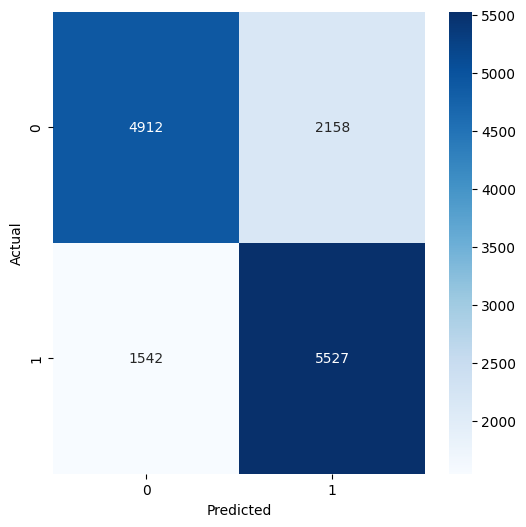


Confusion Matrix DecisionTree
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      7070
           1       0.72      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

Accuracy: 0.7383124690572176
AUC: 0.8112351416618129


In [180]:
y_pred_dt_3 = model_dt_3.predict(X_test_3)
cm = confusion_matrix(y_test_3, y_pred_dt_3)
accuracy = accuracy_score(y_test_3, y_pred_dt_3)
y_scores = model_dt_3.predict_proba(X_test_3)[:, 1]
auc = roc_auc_score(y_test_3, y_scores)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test_3, y_pred_dt_3)
print()
print("Confusion Matrix DecisionTree")
print(report)

print("Accuracy:", accuracy)
print("AUC:", auc)

In [181]:
mulai = time.time()
scores_model_dt_3 = cross_val_score(model_dt_3, X_3, y_3, cv=10)
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_model_dt_3.mean(), scores_model_dt_3.std() * 2, waktu))

Accuracy Decision Tree: 0.74 (+/- 0.02), Waktu = 0.516 detik


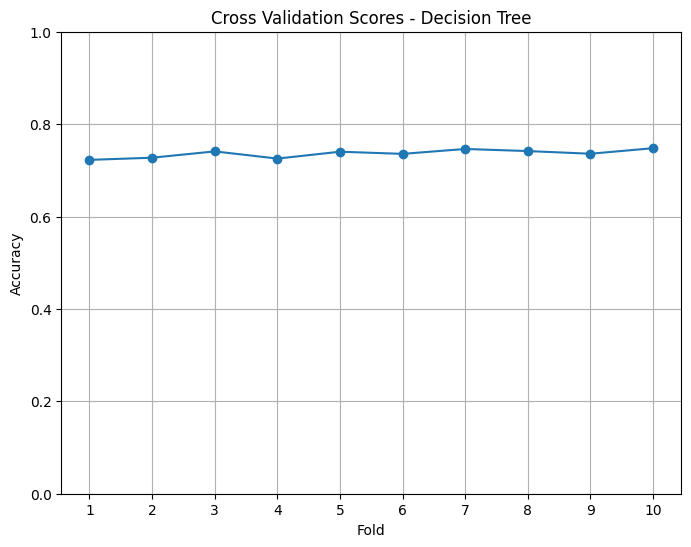

In [182]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11), scores_model_dt_3, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores - Decision Tree')
plt.ylim(0, 1)
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

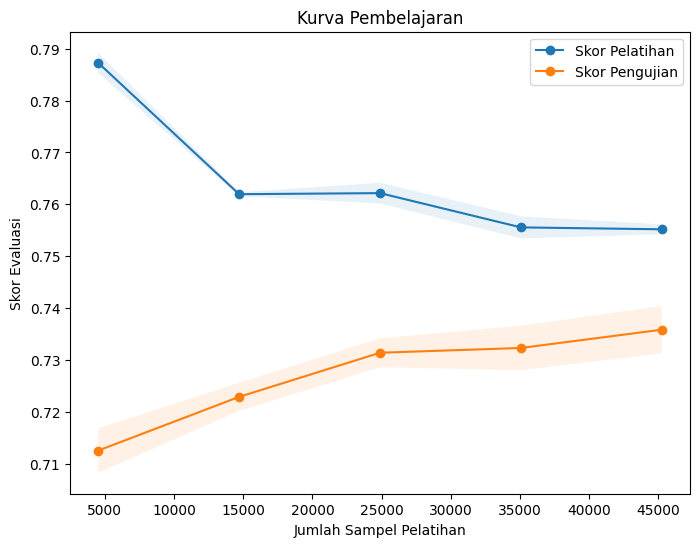

In [183]:
train_sizes, train_scores, test_scores = learning_curve(model_dt_3, X_train_3, y_train_3, cv=5)

# Menghitung rata-rata dan standar deviasi skor evaluasi pada setiap ukuran data pelatihan
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Menampilkan kurva pembelajaran
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Skor Pelatihan')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Skor Pengujian')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Jumlah Sampel Pelatihan')
plt.ylabel('Skor Evaluasi')
plt.title('Kurva Pembelajaran')
plt.legend()
plt.show()


# LATIHAN

In [ ]:
data = {'A': [1, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8],
        'B': [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2],
   'Target': [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]}

cd = pd.DataFrame(data)
cd

In [ ]:
duplicates = cd.duplicated()
dup_counts = duplicates.value_counts()

print(duplicates)
print(dup_counts)

In [ ]:
duplicates = cd.duplicated(subset=['A', 'B'])
dup_counts = duplicates.value_counts()

print(duplicates)
print(dup_counts)

In [ ]:
duplicates = cd.duplicated(subset=['A', 'B'], keep=False)
dup_counts = duplicates.value_counts()

print(duplicates)
print(dup_counts)

In [ ]:
duplicates = cd.duplicated(subset=cd.columns[cd.columns != 'Target'], keep=False)
dup_counts = duplicates.value_counts()

print(duplicates)
print(dup_counts)

In [ ]:
cd

In [ ]:
majority_target = cd.loc[cd.duplicated(subset=['A', 'B'], keep=False), 'Target'].mode()[0]

filtered_cd = cd[~(cd.duplicated(subset=['A', 'B'], keep=False) & (cd['Target'] != majority_target))]
# filtered_cd = cd[~((cd.duplicated(subset=['A', 'B'], keep=False)) & (cd['Target'] != majority_target))]

filtered_cd.drop_duplicates(subset=['A', 'B'], inplace=True)

print(majority_target)
filtered_cd

In [ ]:
majority_target = cd.loc[cd.duplicated(subset=['A', 'B'], keep=False), 'Target'].value_counts().idxmax()

# Mencari persentase kemunculan target mayoritas
majority_target_count = cd.loc[cd['Target'] == majority_target, 'Target'].count()
duplicate_count = cd.duplicated(subset=['A', 'B'], keep=False).sum()
percentage = majority_target_count / duplicate_count

# Filter data berdasarkan kondisi
filtered_cd = cd[~((cd.duplicated(subset=['A', 'B'], keep=False)) & ((cd['Target'] == 1) & (percentage <= 0.74)))]
filtered_cd.drop_duplicates(subset=['A', 'B'], inplace=True)

print(majority_target_count)
print("\nData Setelah Menghapus Duplikat:")
print(filtered_cd)

In [ ]:
value_counts = cd.duplicated(subset=['A', 'B'], keep=False).value_counts()

# Mencari target mayoritas untuk setiap duplikasi data
majority_targets = cd.groupby(['A', 'B'])['Target'].agg(lambda x: x.value_counts().idxmax())
aasa = cd.groupby(['A', 'B'])['Target']

# Filter data berdasarkan kondisi
filtered_cd = cd[~((cd.duplicated(subset=['A', 'B'], keep=False)) & (~cd.apply(lambda row: row['Target'] == majority_targets[(row['A'], row['B'])], axis=1)))]
filtered_cd.drop_duplicates(inplace=True)

print("asa", aasa)
print("\nData Setelah Menghapus Duplikat:")
print(filtered_cd)

In [ ]:
import pandas as pd

# Contoh DataFrame dengan duplikat
data = {'A': [1, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8],
        'B': [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2],
        'Target': [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]}

cd = pd.DataFrame(data)

# Mencari indeks data yang akan dipertahankan
indexes_to_keep = []

# Mengelompokkan data berdasarkan A dan B
grouped = cd.groupby([col for col in cd.columns if col != 'Target'])

for group_name, group_data in grouped:
    # Menghitung jumlah data dan target 1 dalam grup
    total_count = len(group_data)
    target_count = group_data['Target'].sum()

    # Menentukan apakah memenuhi kondisi atau tidak
    if group_data.duplicated(subset=cd.columns[cd.columns != 'Target']).any():
        # Jika duplikat ada dalam grup
        if (target_count / total_count) >= 0.75:
            # Jika target 1 lebih dari 75%, pertahankan data dengan target 1
            indexes_to_keep.extend(group_data[group_data['Target'] == 1].index)
        else:
            # Jika target 1 kurang dari 75%, pertahankan data dengan target 0
            indexes_to_keep.extend(group_data[group_data['Target'] == 0].index)
    else:
        # Jika tidak ada duplikat dalam grup, pertahankan semua data
        indexes_to_keep.extend(group_data.index)

# Menghasilkan DataFrame hasil akhir
filtered_cd = cd.loc[indexes_to_keep]
filtered_cd.drop_duplicates(inplace=True)

print("Data Setelah Filtrasi:")
print(filtered_cd)

In [ ]:
cd